In [1]:
import AbacusCosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import Counter
import scipy.ndimage as scpimg
import h5py
from matplotlib import cm

import glob

In [2]:
archivos = [1,3,7,10]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Catalogo/misma_cosmologia/Simulacion0/fields/watershed_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{}.0_nside_360.hdf5'

grupos = []

for i in archivos:
    with h5py.File(filename.format(i), 'r') as f:
        print(f.keys())
        watershed_groups_key = list(f.keys())[0]
        watershed_groups = np.array(f[watershed_groups_key])
        
    grupos.append(watershed_groups)
    

<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>
<KeysViewHDF5 ['watershed_group']>


In [3]:
volumen = 8
ordenes = []
for i in grupos:
    ordenes.append(len(list(set(i.flatten()))))

In [4]:
volumenes = []
for orden in range(len(ordenes)):
    volumen_actual = []
    for i in range(ordenes[orden]):
        if(i%100==0):
            print(i)
        volumen_actual.append(len(grupos[orden][grupos[orden]==i])*volumen)
    volumenes.append(volumen_actual)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

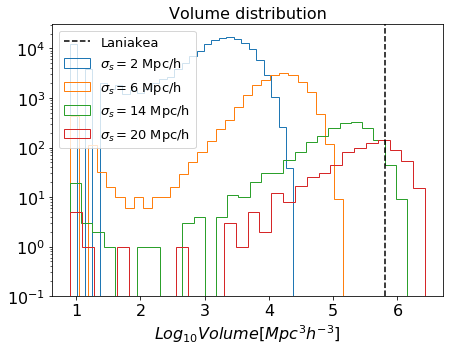

In [18]:
plt.figure(figsize = (7,5))
plt.rcParams.update({'font.size': 16})
plt.axvline(np.log10(645034.5514),linestyle = '--', color = 'black', label = 'Laniakea')

for i in range(len(archivos)):
    plt.hist(np.log10(volumenes[i]),log=True,bins=30, histtype = 'step', label = '$\sigma_s = ${} Mpc/h'.format(archivos[i]*2))
plt.title('Volume distribution', fontsize = 16)
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$', fontsize = 16)
plt.rcParams.update({'font.size': 13})
plt.legend(loc = 2)

In [19]:
for i in range(len(archivos)):
    out = open("sigma{}.csv".format(archivos[i]), "w")
    out.write("volumenes")
    for f in zip(volumenes[i]):
        print(f)
        out.write("{}\n".format(f))
    out.close()

(4024,)
(7704,)
(4496,)
(1552,)
(2184,)
(3000,)
(2616,)
(1768,)
(5272,)
(2024,)
(2760,)
(3104,)
(3120,)
(2560,)
(2768,)
(3008,)
(3568,)
(2368,)
(5240,)
(5056,)
(4248,)
(6240,)
(5472,)
(6568,)
(3976,)
(4024,)
(4536,)
(4656,)
(3424,)
(6192,)
(2264,)
(5144,)
(3680,)
(2560,)
(5344,)
(2752,)
(2240,)
(9600,)
(3144,)
(2616,)
(2704,)
(4016,)
(3216,)
(6680,)
(2536,)
(3216,)
(8432,)
(3192,)
(2896,)
(5888,)
(4168,)
(7344,)
(5680,)
(4400,)
(5176,)
(4688,)
(7232,)
(2552,)
(7072,)
(1120,)
(2848,)
(13384,)
(3760,)
(3984,)
(3056,)
(2520,)
(2040,)
(2680,)
(5512,)
(8296,)
(2368,)
(5792,)
(3400,)
(5064,)
(2992,)
(8184,)
(2232,)
(3744,)
(1352,)
(4192,)
(3824,)
(3872,)
(5112,)
(5976,)
(3768,)
(4032,)
(1184,)
(6256,)
(3056,)
(3352,)
(1312,)
(4024,)
(2440,)
(3912,)
(3840,)
(16,)
(1584,)
(2080,)
(1528,)
(8152,)
(2224,)
(3016,)
(5248,)
(2120,)
(3464,)
(2632,)
(4088,)
(6360,)
(1816,)
(2104,)
(1728,)
(4928,)
(7336,)
(3968,)
(4288,)
(2792,)
(2040,)
(7248,)
(5896,)
(5792,)
(4896,)
(2152,)
(4520,)
(3856,)
(2600,)
(

(3040,)
(4648,)
(4520,)
(2752,)
(1544,)
(1608,)
(3120,)
(3400,)
(4584,)
(2552,)
(2872,)
(4656,)
(6960,)
(5528,)
(2736,)
(3136,)
(1968,)
(856,)
(3344,)
(4120,)
(1144,)
(3056,)
(5256,)
(1768,)
(4984,)
(2976,)
(4960,)
(1824,)
(2664,)
(1496,)
(8,)
(2704,)
(1768,)
(2488,)
(3256,)
(3208,)
(3696,)
(4768,)
(2464,)
(2592,)
(3576,)
(4520,)
(6520,)
(1848,)
(3584,)
(1584,)
(3024,)
(3120,)
(5576,)
(896,)
(2584,)
(7768,)
(3344,)
(8,)
(4304,)
(1432,)
(8,)
(1848,)
(6952,)
(1224,)
(2704,)
(2336,)
(8,)
(2984,)
(2128,)
(4000,)
(4136,)
(4864,)
(2352,)
(3072,)
(1400,)
(5752,)
(1176,)
(3368,)
(3456,)
(3160,)
(4072,)
(1888,)
(5064,)
(2824,)
(1768,)
(1472,)
(6408,)
(16,)
(2384,)
(3688,)
(752,)
(4088,)
(2848,)
(2496,)
(2536,)
(1064,)
(1160,)
(3728,)
(2760,)
(1776,)
(4392,)
(4584,)
(4280,)
(3768,)
(7152,)
(3456,)
(2288,)
(2960,)
(1744,)
(800,)
(2056,)
(4640,)
(736,)
(8304,)
(5056,)
(1120,)
(8,)
(3048,)
(4400,)
(3488,)
(3184,)
(2312,)
(4616,)
(496,)
(2296,)
(3104,)
(2720,)
(2560,)
(3608,)
(7464,)
(7064,)
(1384,)

(8416,)
(728,)
(1240,)
(4640,)
(1704,)
(6376,)
(2536,)
(5072,)
(4720,)
(1536,)
(4104,)
(976,)
(1992,)
(8,)
(2424,)
(5376,)
(2472,)
(2448,)
(4368,)
(2280,)
(1672,)
(2792,)
(1760,)
(2544,)
(3400,)
(2208,)
(1656,)
(1464,)
(3896,)
(1920,)
(2848,)
(3144,)
(1824,)
(2936,)
(3080,)
(1320,)
(2280,)
(9912,)
(2536,)
(768,)
(880,)
(6856,)
(1312,)
(2472,)
(808,)
(2888,)
(2832,)
(1176,)
(2024,)
(2616,)
(3072,)
(1648,)
(3800,)
(8816,)
(4064,)
(1704,)
(5488,)
(2904,)
(2416,)
(792,)
(3144,)
(3128,)
(2928,)
(1192,)
(1248,)
(1504,)
(2352,)
(832,)
(4408,)
(1392,)
(3424,)
(4048,)
(2720,)
(3184,)
(1728,)
(2856,)
(6336,)
(5464,)
(8,)
(632,)
(6368,)
(944,)
(4256,)
(960,)
(824,)
(2112,)
(1752,)
(1712,)
(3576,)
(704,)
(5168,)
(2056,)
(1528,)
(4048,)
(2928,)
(12424,)
(3320,)
(2848,)
(528,)
(2280,)
(4744,)
(2784,)
(4016,)
(2248,)
(3096,)
(3104,)
(2112,)
(1928,)
(2784,)
(9096,)
(1152,)
(3032,)
(2736,)
(3672,)
(5400,)
(1696,)
(5976,)
(1928,)
(568,)
(2472,)
(3144,)
(10472,)
(3568,)
(856,)
(5064,)
(3960,)
(5600,)
(36

(2200,)
(6232,)
(6760,)
(2144,)
(1560,)
(5816,)
(1312,)
(2160,)
(1792,)
(1440,)
(2088,)
(2800,)
(1112,)
(1024,)
(4080,)
(2656,)
(6616,)
(2928,)
(816,)
(1904,)
(720,)
(2872,)
(1200,)
(4816,)
(1984,)
(3128,)
(2328,)
(3712,)
(2392,)
(5504,)
(2792,)
(4424,)
(720,)
(3528,)
(2480,)
(1944,)
(856,)
(2072,)
(2280,)
(3856,)
(2896,)
(2440,)
(1464,)
(2920,)
(3632,)
(5440,)
(2264,)
(2840,)
(4056,)
(3160,)
(2992,)
(8024,)
(2808,)
(5256,)
(848,)
(7064,)
(8832,)
(11328,)
(1680,)
(1784,)
(5344,)
(1192,)
(3272,)
(2376,)
(2280,)
(4128,)
(5600,)
(1680,)
(2424,)
(1344,)
(2808,)
(816,)
(5232,)
(3560,)
(2128,)
(1416,)
(4832,)
(2240,)
(24,)
(8,)
(2624,)
(3136,)
(2624,)
(8,)
(2320,)
(1136,)
(2672,)
(3888,)
(496,)
(3200,)
(6456,)
(3456,)
(4952,)
(8624,)
(4688,)
(5672,)
(2736,)
(5424,)
(1488,)
(5792,)
(840,)
(4576,)
(3088,)
(2288,)
(3176,)
(1464,)
(13152,)
(2936,)
(1288,)
(1200,)
(536,)
(1864,)
(3352,)
(2424,)
(2928,)
(6280,)
(3424,)
(11128,)
(2464,)
(3296,)
(4552,)
(2056,)
(3392,)
(2440,)
(3032,)
(648,)
(1224,)

(2584,)
(3448,)
(2648,)
(1704,)
(1656,)
(2688,)
(1528,)
(3048,)
(6120,)
(7952,)
(24,)
(864,)
(4056,)
(3016,)
(4328,)
(2384,)
(8,)
(2368,)
(5600,)
(2752,)
(4752,)
(3576,)
(5480,)
(1792,)
(1880,)
(3680,)
(3336,)
(5792,)
(1784,)
(4272,)
(2104,)
(3456,)
(4504,)
(5936,)
(5272,)
(2784,)
(1152,)
(4888,)
(784,)
(2664,)
(888,)
(2376,)
(1184,)
(4104,)
(6224,)
(864,)
(1064,)
(3440,)
(1088,)
(1016,)
(1088,)
(3376,)
(5192,)
(3504,)
(576,)
(3648,)
(3864,)
(4968,)
(1800,)
(2624,)
(4248,)
(7432,)
(2040,)
(2360,)
(1328,)
(1520,)
(1888,)
(4872,)
(2520,)
(2832,)
(2176,)
(1784,)
(1248,)
(3504,)
(1840,)
(3200,)
(1472,)
(16,)
(1488,)
(3056,)
(2864,)
(5848,)
(4504,)
(2664,)
(3864,)
(2240,)
(3200,)
(1520,)
(1632,)
(1504,)
(3248,)
(4928,)
(3288,)
(920,)
(5960,)
(9328,)
(1856,)
(656,)
(4552,)
(3624,)
(2080,)
(2688,)
(3224,)
(2768,)
(4880,)
(2928,)
(1048,)
(496,)
(2648,)
(2960,)
(5248,)
(1344,)
(8,)
(2728,)
(6960,)
(624,)
(3496,)
(11016,)
(2560,)
(3648,)
(3840,)
(584,)
(1288,)
(3280,)
(6496,)
(2632,)
(2832,)
(42

(32,)
(4016,)
(4824,)
(4952,)
(3912,)
(8,)
(3336,)
(3744,)
(3368,)
(2600,)
(760,)
(1416,)
(2072,)
(2840,)
(1576,)
(2480,)
(1792,)
(3400,)
(2712,)
(3064,)
(1128,)
(2144,)
(2416,)
(2640,)
(1440,)
(3384,)
(3728,)
(1064,)
(6048,)
(2528,)
(4480,)
(1520,)
(2040,)
(3280,)
(8,)
(5432,)
(5304,)
(10512,)
(8896,)
(2296,)
(3880,)
(9664,)
(976,)
(4088,)
(2208,)
(4232,)
(3104,)
(1736,)
(1648,)
(8,)
(1256,)
(2880,)
(5976,)
(1376,)
(1024,)
(432,)
(1224,)
(2456,)
(2440,)
(2128,)
(1144,)
(1592,)
(2592,)
(5952,)
(3432,)
(800,)
(2472,)
(6544,)
(5048,)
(9168,)
(1744,)
(2000,)
(2360,)
(4688,)
(3152,)
(9272,)
(1312,)
(4032,)
(2328,)
(1944,)
(7312,)
(3408,)
(1440,)
(1272,)
(3472,)
(4232,)
(4072,)
(2792,)
(5160,)
(2336,)
(1672,)
(848,)
(4600,)
(920,)
(3240,)
(6984,)
(1856,)
(8,)
(2152,)
(2208,)
(1744,)
(3968,)
(8,)
(3392,)
(2376,)
(6416,)
(1720,)
(7440,)
(3440,)
(8,)
(1640,)
(1712,)
(136,)
(1528,)
(968,)
(1784,)
(1864,)
(2240,)
(600,)
(4656,)
(1424,)
(4872,)
(1248,)
(3480,)
(2208,)
(6736,)
(2024,)
(6320,)
(355

(4056,)
(24,)
(7112,)
(5752,)
(1648,)
(3352,)
(3864,)
(3768,)
(2560,)
(2408,)
(2848,)
(2288,)
(768,)
(1192,)
(1752,)
(2664,)
(2432,)
(5592,)
(5056,)
(2648,)
(6224,)
(832,)
(4104,)
(5520,)
(2960,)
(5912,)
(6800,)
(6440,)
(392,)
(4184,)
(2240,)
(4280,)
(1960,)
(2912,)
(1152,)
(9280,)
(3472,)
(728,)
(2592,)
(2032,)
(1552,)
(1424,)
(1896,)
(7704,)
(1960,)
(4992,)
(2632,)
(3112,)
(5792,)
(8,)
(24,)
(1912,)
(2216,)
(3152,)
(2640,)
(1536,)
(4480,)
(1608,)
(3864,)
(2488,)
(1384,)
(1576,)
(2472,)
(3384,)
(440,)
(1088,)
(2656,)
(544,)
(1600,)
(680,)
(4312,)
(3976,)
(3280,)
(4424,)
(5712,)
(7928,)
(2168,)
(8032,)
(3160,)
(2528,)
(3752,)
(2000,)
(9440,)
(2984,)
(1824,)
(4440,)
(6744,)
(1272,)
(5872,)
(8160,)
(3448,)
(2408,)
(1112,)
(1336,)
(2432,)
(8,)
(8456,)
(2176,)
(8,)
(3592,)
(360,)
(3768,)
(1568,)
(6040,)
(3744,)
(2032,)
(520,)
(1232,)
(3832,)
(1200,)
(1536,)
(1720,)
(6792,)
(1128,)
(3832,)
(4560,)
(6904,)
(1944,)
(1096,)
(4872,)
(3296,)
(4280,)
(2024,)
(1032,)
(896,)
(1200,)
(2872,)
(6496,)

(2936,)
(2984,)
(2040,)
(1640,)
(3864,)
(440,)
(5592,)
(4544,)
(2856,)
(1264,)
(8,)
(1592,)
(2896,)
(1112,)
(1616,)
(736,)
(3248,)
(1752,)
(4064,)
(8752,)
(5752,)
(1664,)
(5216,)
(2736,)
(2352,)
(1736,)
(2784,)
(1776,)
(3896,)
(2184,)
(4008,)
(3256,)
(2224,)
(4040,)
(968,)
(2192,)
(5400,)
(3776,)
(5592,)
(2824,)
(2344,)
(4400,)
(928,)
(2608,)
(5400,)
(6184,)
(5872,)
(864,)
(1504,)
(2464,)
(2424,)
(496,)
(2080,)
(1208,)
(16,)
(9032,)
(2048,)
(4360,)
(4416,)
(3704,)
(2248,)
(960,)
(1552,)
(920,)
(5000,)
(4248,)
(7432,)
(976,)
(4872,)
(5048,)
(2968,)
(2032,)
(1368,)
(1440,)
(1752,)
(2120,)
(5008,)
(4064,)
(2264,)
(3880,)
(3440,)
(4760,)
(5216,)
(848,)
(2896,)
(96,)
(4792,)
(2792,)
(1528,)
(8,)
(3992,)
(4048,)
(1504,)
(8144,)
(1464,)
(1008,)
(1528,)
(13392,)
(5568,)
(2232,)
(1832,)
(2256,)
(2024,)
(4256,)
(4248,)
(2208,)
(8288,)
(32,)
(1592,)
(3272,)
(824,)
(2352,)
(4968,)
(1216,)
(16,)
(4952,)
(2720,)
(1584,)
(6792,)
(4096,)
(1456,)
(3680,)
(3416,)
(2448,)
(8,)
(1496,)
(8,)
(6832,)
(2904,

(2232,)
(4808,)
(1272,)
(1296,)
(2352,)
(776,)
(4624,)
(7744,)
(2072,)
(808,)
(808,)
(1960,)
(1792,)
(1832,)
(1896,)
(1984,)
(1488,)
(1920,)
(2064,)
(6312,)
(240,)
(6264,)
(2728,)
(1112,)
(928,)
(3376,)
(3520,)
(2608,)
(3312,)
(648,)
(2816,)
(3528,)
(2280,)
(8,)
(1896,)
(1448,)
(2344,)
(1144,)
(2680,)
(1120,)
(1296,)
(752,)
(2528,)
(2112,)
(1896,)
(8,)
(3648,)
(10200,)
(1832,)
(1568,)
(2664,)
(6512,)
(8312,)
(2696,)
(592,)
(4520,)
(1880,)
(8128,)
(6376,)
(3064,)
(2736,)
(3376,)
(2448,)
(1200,)
(11640,)
(2192,)
(3408,)
(1640,)
(3176,)
(1280,)
(2448,)
(752,)
(1424,)
(1256,)
(1392,)
(1000,)
(2984,)
(1216,)
(3064,)
(8,)
(1736,)
(4648,)
(2048,)
(4192,)
(1616,)
(2968,)
(4120,)
(2744,)
(2816,)
(1800,)
(8,)
(8,)
(2112,)
(872,)
(4960,)
(3632,)
(1464,)
(2336,)
(1752,)
(3776,)
(3984,)
(3568,)
(1176,)
(2392,)
(2800,)
(1448,)
(4152,)
(3408,)
(3128,)
(1752,)
(5880,)
(4728,)
(1728,)
(3368,)
(3144,)
(8216,)
(2088,)
(8104,)
(2104,)
(3760,)
(1096,)
(1936,)
(1368,)
(6152,)
(2680,)
(7320,)
(4176,)
(2512,)

(1264,)
(8,)
(2248,)
(2784,)
(3704,)
(4920,)
(4840,)
(1416,)
(2624,)
(3696,)
(1200,)
(3072,)
(1536,)
(2496,)
(1624,)
(1648,)
(1832,)
(3920,)
(720,)
(744,)
(784,)
(2264,)
(1520,)
(808,)
(3512,)
(2800,)
(1584,)
(536,)
(472,)
(752,)
(1936,)
(3304,)
(3920,)
(2656,)
(2216,)
(568,)
(624,)
(3080,)
(3272,)
(2808,)
(1720,)
(2192,)
(1008,)
(2880,)
(2784,)
(3400,)
(3472,)
(1320,)
(920,)
(8,)
(2568,)
(3312,)
(4688,)
(1880,)
(4552,)
(1800,)
(1656,)
(864,)
(4200,)
(5368,)
(5504,)
(1832,)
(1272,)
(7776,)
(7672,)
(3696,)
(7272,)
(1360,)
(1936,)
(6640,)
(1424,)
(2376,)
(1120,)
(1792,)
(1720,)
(2752,)
(1288,)
(5328,)
(2608,)
(12080,)
(2368,)
(2312,)
(1776,)
(1856,)
(1608,)
(8,)
(1472,)
(1848,)
(2976,)
(3336,)
(7896,)
(2592,)
(2416,)
(2736,)
(6568,)
(4464,)
(3408,)
(2456,)
(9320,)
(3000,)
(1184,)
(568,)
(816,)
(1208,)
(3440,)
(1896,)
(4184,)
(888,)
(2928,)
(3736,)
(1272,)
(4488,)
(1256,)
(656,)
(1656,)
(2912,)
(1344,)
(3144,)
(6192,)
(8,)
(3248,)
(1904,)
(1232,)
(8024,)
(6712,)
(2720,)
(2120,)
(2616,)
(5

(1640,)
(6784,)
(2232,)
(1360,)
(1576,)
(1680,)
(936,)
(2328,)
(8,)
(1096,)
(8,)
(2104,)
(8440,)
(1544,)
(2856,)
(1496,)
(2048,)
(1544,)
(3488,)
(6112,)
(1096,)
(8248,)
(8,)
(11800,)
(1920,)
(2616,)
(3552,)
(2128,)
(3808,)
(840,)
(2056,)
(3360,)
(7016,)
(976,)
(3752,)
(4184,)
(2192,)
(1520,)
(4952,)
(2912,)
(5608,)
(6416,)
(120,)
(8176,)
(3456,)
(4960,)
(1424,)
(3616,)
(1376,)
(5792,)
(3080,)
(2848,)
(4016,)
(712,)
(2904,)
(1816,)
(1552,)
(2760,)
(4104,)
(808,)
(8,)
(2336,)
(5080,)
(4080,)
(1280,)
(9408,)
(2904,)
(1576,)
(1784,)
(2016,)
(8,)
(3944,)
(3968,)
(2232,)
(6208,)
(4952,)
(4560,)
(2176,)
(2728,)
(2304,)
(1888,)
(1464,)
(4056,)
(1264,)
(2336,)
(3496,)
(488,)
(1064,)
(2024,)
(1256,)
(88,)
(2504,)
(7768,)
(1080,)
(752,)
(2792,)
(10752,)
(6360,)
(4872,)
(3832,)
(992,)
(1600,)
(1608,)
(3624,)
(2256,)
(1536,)
(3144,)
(2720,)
(3424,)
(1136,)
(2640,)
(3288,)
(2864,)
(2280,)
(704,)
(8,)
(1032,)
(664,)
(3192,)
(2592,)
(3752,)
(1472,)
(16,)
(2408,)
(4088,)
(592,)
(2968,)
(3224,)
(2304,)


(952,)
(256,)
(1672,)
(2864,)
(1160,)
(2680,)
(6408,)
(2896,)
(3496,)
(1176,)
(1912,)
(3136,)
(8,)
(7160,)
(5072,)
(1080,)
(2040,)
(1760,)
(4648,)
(760,)
(2752,)
(2976,)
(7632,)
(1632,)
(1808,)
(1176,)
(2928,)
(5216,)
(5816,)
(1136,)
(5504,)
(3560,)
(3528,)
(1832,)
(3648,)
(4208,)
(2288,)
(5064,)
(1760,)
(2232,)
(2840,)
(1104,)
(1640,)
(2624,)
(880,)
(2376,)
(2744,)
(2136,)
(2232,)
(2616,)
(2408,)
(1864,)
(5168,)
(2544,)
(8,)
(736,)
(3904,)
(6080,)
(2064,)
(3792,)
(280,)
(512,)
(2192,)
(808,)
(3464,)
(3928,)
(4128,)
(2456,)
(768,)
(2120,)
(3344,)
(4488,)
(1288,)
(6016,)
(3104,)
(2736,)
(544,)
(2224,)
(2784,)
(1640,)
(2536,)
(2352,)
(8,)
(1784,)
(4192,)
(2072,)
(4656,)
(1752,)
(1416,)
(2024,)
(2568,)
(1096,)
(1536,)
(2064,)
(640,)
(1576,)
(2448,)
(1416,)
(1200,)
(4264,)
(1592,)
(1992,)
(1792,)
(504,)
(2312,)
(2352,)
(3600,)
(4552,)
(16,)
(2936,)
(2880,)
(3168,)
(1376,)
(1080,)
(3112,)
(3304,)
(856,)
(928,)
(744,)
(920,)
(3160,)
(488,)
(3176,)
(2824,)
(2320,)
(2712,)
(5448,)
(1904,)
(376

(1072,)
(6312,)
(2152,)
(3312,)
(1248,)
(3064,)
(6072,)
(1912,)
(5720,)
(856,)
(2368,)
(1072,)
(1512,)
(7056,)
(3952,)
(12688,)
(4856,)
(8,)
(8,)
(1896,)
(6312,)
(2040,)
(1584,)
(2024,)
(5008,)
(5864,)
(4872,)
(1608,)
(5568,)
(7176,)
(3856,)
(3032,)
(1464,)
(4576,)
(928,)
(2120,)
(1032,)
(8480,)
(1192,)
(3096,)
(5288,)
(1056,)
(1400,)
(3216,)
(968,)
(1888,)
(3064,)
(2760,)
(3392,)
(1432,)
(672,)
(11472,)
(1848,)
(352,)
(1848,)
(1152,)
(704,)
(312,)
(5936,)
(4928,)
(3808,)
(1600,)
(4968,)
(2664,)
(1712,)
(6784,)
(1808,)
(5592,)
(1240,)
(2904,)
(1680,)
(2416,)
(1320,)
(2680,)
(1992,)
(4680,)
(3736,)
(3384,)
(3136,)
(3176,)
(4952,)
(3696,)
(2488,)
(1632,)
(928,)
(3280,)
(3776,)
(1176,)
(8208,)
(5648,)
(2376,)
(5320,)
(856,)
(856,)
(2584,)
(1992,)
(3360,)
(2384,)
(1320,)
(7008,)
(1656,)
(5136,)
(6072,)
(3688,)
(6192,)
(2184,)
(5840,)
(22960,)
(4976,)
(1584,)
(1944,)
(816,)
(1624,)
(4896,)
(2296,)
(5128,)
(3400,)
(1248,)
(4304,)
(2872,)
(6336,)
(3992,)
(6720,)
(1784,)
(2656,)
(2752,)
(2064,

(720,)
(2272,)
(3000,)
(2008,)
(1720,)
(880,)
(1952,)
(2480,)
(4632,)
(1664,)
(1112,)
(1144,)
(2760,)
(2656,)
(10232,)
(1248,)
(1176,)
(1392,)
(3592,)
(1872,)
(816,)
(4264,)
(2664,)
(9664,)
(2616,)
(384,)
(2352,)
(2920,)
(4112,)
(6160,)
(2552,)
(1464,)
(3136,)
(2160,)
(4248,)
(464,)
(2144,)
(2200,)
(1272,)
(872,)
(8864,)
(3960,)
(3872,)
(2160,)
(16,)
(1296,)
(3512,)
(2736,)
(8016,)
(976,)
(2872,)
(5784,)
(2296,)
(632,)
(6568,)
(5480,)
(4096,)
(1232,)
(1640,)
(2824,)
(3320,)
(1824,)
(3840,)
(3040,)
(2144,)
(872,)
(1600,)
(1200,)
(4880,)
(8096,)
(5760,)
(2032,)
(1496,)
(4672,)
(6240,)
(4456,)
(944,)
(2056,)
(3248,)
(1904,)
(2552,)
(2296,)
(4456,)
(1192,)
(3168,)
(3368,)
(1552,)
(4456,)
(6592,)
(5080,)
(7600,)
(3512,)
(9416,)
(2608,)
(832,)
(7680,)
(1192,)
(216,)
(944,)
(1816,)
(1376,)
(280,)
(3168,)
(2048,)
(3936,)
(504,)
(1984,)
(1784,)
(7656,)
(2248,)
(1336,)
(2376,)
(4168,)
(1360,)
(1928,)
(440,)
(7984,)
(352,)
(2576,)
(8,)
(2000,)
(1528,)
(1056,)
(8,)
(2360,)
(2880,)
(2992,)
(2296,)


(3152,)
(1280,)
(2144,)
(2136,)
(3792,)
(368,)
(11360,)
(1888,)
(3112,)
(2200,)
(936,)
(712,)
(1888,)
(1192,)
(4360,)
(2400,)
(2136,)
(888,)
(1128,)
(1536,)
(2608,)
(1376,)
(1704,)
(1696,)
(8,)
(128,)
(2912,)
(1552,)
(16,)
(1112,)
(2296,)
(7328,)
(3504,)
(1456,)
(1344,)
(3536,)
(8,)
(736,)
(2304,)
(2856,)
(3632,)
(4272,)
(2832,)
(2376,)
(880,)
(1880,)
(2880,)
(2080,)
(2280,)
(1520,)
(1992,)
(3432,)
(1544,)
(6336,)
(3536,)
(3576,)
(6416,)
(8,)
(2904,)
(2520,)
(2808,)
(3928,)
(8144,)
(3192,)
(440,)
(6352,)
(2304,)
(1960,)
(744,)
(2960,)
(1608,)
(2232,)
(3504,)
(8,)
(1680,)
(2496,)
(1456,)
(1752,)
(3272,)
(6072,)
(2064,)
(1856,)
(3968,)
(664,)
(1272,)
(2520,)
(944,)
(3720,)
(1048,)
(392,)
(1184,)
(400,)
(2184,)
(2528,)
(1432,)
(2296,)
(1088,)
(2456,)
(832,)
(2296,)
(9600,)
(3336,)
(2176,)
(1792,)
(120,)
(440,)
(2088,)
(6016,)
(2992,)
(2728,)
(1040,)
(1712,)
(1320,)
(1880,)
(3568,)
(760,)
(928,)
(2280,)
(1928,)
(2520,)
(14856,)
(3160,)
(1288,)
(4984,)
(3296,)
(1408,)
(3240,)
(5736,)
(2680,

(6728,)
(256,)
(2256,)
(4376,)
(7000,)
(2344,)
(8,)
(2248,)
(6952,)
(848,)
(2088,)
(2648,)
(984,)
(3640,)
(2304,)
(1104,)
(296,)
(1520,)
(5056,)
(4736,)
(2400,)
(608,)
(7008,)
(944,)
(560,)
(2992,)
(536,)
(10736,)
(816,)
(2400,)
(3080,)
(1152,)
(1904,)
(8,)
(2936,)
(7304,)
(808,)
(912,)
(4048,)
(744,)
(8,)
(1976,)
(2352,)
(1208,)
(2192,)
(1928,)
(2344,)
(280,)
(360,)
(4936,)
(1656,)
(11936,)
(7192,)
(3440,)
(2984,)
(2792,)
(840,)
(4000,)
(4000,)
(5200,)
(1712,)
(904,)
(3656,)
(5232,)
(1984,)
(1304,)
(3360,)
(2096,)
(1464,)
(11488,)
(928,)
(11472,)
(4256,)
(2592,)
(1592,)
(3144,)
(2408,)
(1192,)
(1400,)
(3072,)
(2984,)
(576,)
(2072,)
(992,)
(2584,)
(3720,)
(3888,)
(2496,)
(1664,)
(528,)
(1248,)
(1872,)
(1344,)
(3536,)
(632,)
(2176,)
(768,)
(1432,)
(1912,)
(3640,)
(9896,)
(1664,)
(1536,)
(1008,)
(1256,)
(4528,)
(1960,)
(3624,)
(400,)
(3456,)
(2176,)
(2608,)
(4720,)
(2064,)
(11080,)
(792,)
(1224,)
(3632,)
(336,)
(8,)
(10296,)
(1792,)
(800,)
(7552,)
(1224,)
(4672,)
(2976,)
(512,)
(1400,)
(

(744,)
(5400,)
(12768,)
(1672,)
(728,)
(2448,)
(1208,)
(1672,)
(2352,)
(1712,)
(1208,)
(5368,)
(1448,)
(304,)
(4816,)
(480,)
(2672,)
(8,)
(1720,)
(9672,)
(760,)
(3440,)
(5336,)
(760,)
(1000,)
(4160,)
(1544,)
(2064,)
(760,)
(1712,)
(3944,)
(2464,)
(2312,)
(2976,)
(2616,)
(6464,)
(1432,)
(6208,)
(1240,)
(2176,)
(1200,)
(1632,)
(968,)
(4248,)
(3088,)
(2504,)
(1896,)
(1648,)
(1192,)
(1096,)
(1072,)
(2544,)
(1136,)
(3320,)
(1096,)
(1096,)
(2272,)
(1520,)
(720,)
(2264,)
(1008,)
(1032,)
(1160,)
(1344,)
(5464,)
(2072,)
(2312,)
(1344,)
(4752,)
(1880,)
(1624,)
(2120,)
(4176,)
(2488,)
(1272,)
(2536,)
(1256,)
(3336,)
(3272,)
(2544,)
(3600,)
(2024,)
(11152,)
(376,)
(2872,)
(2208,)
(3024,)
(6672,)
(1224,)
(5080,)
(4336,)
(976,)
(1192,)
(5416,)
(640,)
(6552,)
(1192,)
(696,)
(2992,)
(2400,)
(2784,)
(1872,)
(608,)
(5464,)
(1336,)
(2832,)
(1736,)
(2424,)
(2720,)
(1688,)
(2624,)
(1680,)
(3352,)
(576,)
(2208,)
(2088,)
(8,)
(2240,)
(3120,)
(3352,)
(1024,)
(568,)
(3136,)
(1072,)
(1416,)
(16,)
(2104,)
(3024,

(1464,)
(8,)
(10216,)
(1504,)
(2232,)
(1152,)
(3328,)
(1416,)
(528,)
(1072,)
(5648,)
(6952,)
(2160,)
(1368,)
(656,)
(5240,)
(7208,)
(2288,)
(8,)
(2952,)
(3512,)
(3104,)
(4784,)
(2848,)
(8,)
(3936,)
(904,)
(5760,)
(3040,)
(472,)
(2184,)
(264,)
(1272,)
(1384,)
(6024,)
(2288,)
(2448,)
(2944,)
(4736,)
(2408,)
(528,)
(4376,)
(816,)
(992,)
(5128,)
(1976,)
(3264,)
(1712,)
(3312,)
(2472,)
(3128,)
(832,)
(2544,)
(2120,)
(2752,)
(1336,)
(3472,)
(872,)
(1728,)
(1392,)
(1144,)
(376,)
(4192,)
(2160,)
(2936,)
(576,)
(2280,)
(2632,)
(2112,)
(2856,)
(5064,)
(520,)
(3360,)
(1224,)
(3272,)
(1200,)
(840,)
(1096,)
(5696,)
(504,)
(1256,)
(1208,)
(960,)
(1144,)
(8664,)
(5216,)
(536,)
(32,)
(2088,)
(2992,)
(3752,)
(4056,)
(1544,)
(3320,)
(8280,)
(2880,)
(1072,)
(1336,)
(4048,)
(1696,)
(1128,)
(2424,)
(5064,)
(776,)
(3016,)
(1616,)
(2952,)
(1080,)
(912,)
(1496,)
(8,)
(3464,)
(4488,)
(3752,)
(1072,)
(1208,)
(1432,)
(5768,)
(1712,)
(1000,)
(5552,)
(6640,)
(2416,)
(224,)
(3496,)
(5360,)
(944,)
(1920,)
(8,)
(1624

(3784,)
(4816,)
(2560,)
(2376,)
(2000,)
(2080,)
(2264,)
(2576,)
(5064,)
(2744,)
(8,)
(4696,)
(1768,)
(2440,)
(7496,)
(1632,)
(1808,)
(3456,)
(8200,)
(1552,)
(3752,)
(16,)
(800,)
(200,)
(5968,)
(1640,)
(4768,)
(1432,)
(1440,)
(856,)
(8048,)
(3224,)
(1136,)
(5016,)
(3056,)
(1448,)
(8,)
(1200,)
(2504,)
(2144,)
(3752,)
(4712,)
(1992,)
(648,)
(1856,)
(1064,)
(3296,)
(5560,)
(2120,)
(2064,)
(3856,)
(1760,)
(2248,)
(3464,)
(1576,)
(976,)
(840,)
(3224,)
(4528,)
(1456,)
(2200,)
(2080,)
(2912,)
(2168,)
(1784,)
(4464,)
(7992,)
(1264,)
(1184,)
(832,)
(8576,)
(1176,)
(7000,)
(360,)
(1240,)
(1496,)
(1000,)
(784,)
(1584,)
(1424,)
(2472,)
(3936,)
(3304,)
(728,)
(1696,)
(2032,)
(3024,)
(3248,)
(3888,)
(1120,)
(3920,)
(936,)
(2048,)
(1448,)
(4256,)
(912,)
(5344,)
(10424,)
(3064,)
(1456,)
(2576,)
(2656,)
(2704,)
(5640,)
(1664,)
(16,)
(1424,)
(4184,)
(8,)
(4032,)
(3080,)
(4560,)
(8,)
(1144,)
(3368,)
(1152,)
(1712,)
(1320,)
(9160,)
(1400,)
(1920,)
(2168,)
(1608,)
(768,)
(6584,)
(640,)
(2216,)
(832,)
(8,)
(

(8,)
(6680,)
(1464,)
(1728,)
(1896,)
(4080,)
(8,)
(1464,)
(2784,)
(824,)
(2104,)
(3240,)
(8,)
(4224,)
(1952,)
(1256,)
(1264,)
(1464,)
(1872,)
(720,)
(4696,)
(3528,)
(6408,)
(6216,)
(1048,)
(8,)
(4256,)
(1744,)
(1136,)
(1296,)
(3176,)
(960,)
(1624,)
(8,)
(8080,)
(712,)
(2800,)
(1816,)
(1848,)
(968,)
(1080,)
(4824,)
(1480,)
(1384,)
(1448,)
(6048,)
(2032,)
(776,)
(1760,)
(4640,)
(6248,)
(592,)
(1568,)
(3248,)
(4104,)
(1152,)
(2448,)
(4088,)
(1184,)
(4544,)
(1448,)
(1472,)
(5352,)
(1456,)
(4040,)
(3920,)
(5840,)
(784,)
(4744,)
(2904,)
(4288,)
(704,)
(512,)
(5952,)
(440,)
(2752,)
(3616,)
(4896,)
(6024,)
(1016,)
(664,)
(1200,)
(1944,)
(1680,)
(2056,)
(2912,)
(800,)
(12136,)
(4616,)
(7600,)
(2552,)
(2632,)
(1904,)
(4208,)
(2336,)
(2784,)
(4288,)
(3224,)
(720,)
(7752,)
(2624,)
(5104,)
(640,)
(6560,)
(2144,)
(3768,)
(1520,)
(896,)
(4712,)
(816,)
(2664,)
(2328,)
(7856,)
(1624,)
(1272,)
(3056,)
(896,)
(4168,)
(2440,)
(8,)
(8,)
(4112,)
(5408,)
(3616,)
(3408,)
(1616,)
(2776,)
(1360,)
(8256,)
(5960,

(2816,)
(1648,)
(1616,)
(1472,)
(2512,)
(1888,)
(1704,)
(1328,)
(1928,)
(928,)
(3416,)
(4080,)
(3184,)
(1200,)
(1280,)
(640,)
(3032,)
(2216,)
(2856,)
(2672,)
(8,)
(1840,)
(5768,)
(1152,)
(1784,)
(4056,)
(2072,)
(4704,)
(1112,)
(1528,)
(776,)
(1704,)
(1528,)
(6208,)
(1200,)
(2864,)
(3088,)
(2024,)
(5112,)
(2232,)
(3872,)
(1648,)
(2416,)
(2656,)
(784,)
(1776,)
(1528,)
(1560,)
(928,)
(720,)
(1616,)
(1968,)
(2944,)
(6296,)
(1624,)
(3672,)
(2464,)
(1928,)
(8,)
(6312,)
(2680,)
(728,)
(3208,)
(232,)
(1624,)
(1384,)
(4472,)
(3560,)
(1256,)
(7728,)
(3272,)
(4920,)
(2872,)
(1328,)
(1664,)
(2600,)
(2192,)
(4392,)
(1536,)
(1848,)
(2488,)
(624,)
(3896,)
(3200,)
(2384,)
(1928,)
(5456,)
(888,)
(7392,)
(4192,)
(4768,)
(504,)
(1880,)
(3936,)
(3160,)
(4408,)
(4832,)
(8,)
(4456,)
(1152,)
(3360,)
(1128,)
(1672,)
(2840,)
(2016,)
(1440,)
(3960,)
(5568,)
(3184,)
(9016,)
(920,)
(3384,)
(3384,)
(4984,)
(1392,)
(888,)
(2448,)
(1304,)
(944,)
(664,)
(2936,)
(2000,)
(2768,)
(1272,)
(7760,)
(1536,)
(656,)
(8480,)
(

(4840,)
(2992,)
(24,)
(976,)
(1800,)
(576,)
(3216,)
(1392,)
(496,)
(680,)
(968,)
(1056,)
(3320,)
(8,)
(1192,)
(1440,)
(2320,)
(880,)
(1480,)
(1248,)
(10176,)
(1384,)
(3640,)
(3456,)
(472,)
(3792,)
(504,)
(2112,)
(1504,)
(2192,)
(8,)
(1048,)
(1296,)
(3640,)
(2576,)
(1088,)
(1832,)
(392,)
(2224,)
(1104,)
(1248,)
(5528,)
(4112,)
(2736,)
(2912,)
(1064,)
(1416,)
(2800,)
(5056,)
(2264,)
(1040,)
(1112,)
(1944,)
(304,)
(2216,)
(3304,)
(2016,)
(464,)
(1168,)
(2920,)
(2344,)
(8184,)
(3624,)
(5832,)
(960,)
(8,)
(640,)
(2568,)
(984,)
(2680,)
(8,)
(1304,)
(5256,)
(2248,)
(2096,)
(1944,)
(2800,)
(8,)
(1112,)
(1264,)
(1696,)
(1248,)
(2496,)
(8,)
(400,)
(2200,)
(2400,)
(2400,)
(5016,)
(336,)
(16,)
(5936,)
(800,)
(3304,)
(1816,)
(1408,)
(12416,)
(5184,)
(8928,)
(3128,)
(1576,)
(8,)
(9808,)
(4104,)
(8,)
(312,)
(2336,)
(1560,)
(4024,)
(1408,)
(2608,)
(1328,)
(1912,)
(856,)
(4120,)
(1336,)
(1664,)
(1520,)
(6344,)
(2456,)
(664,)
(1464,)
(1432,)
(4768,)
(528,)
(712,)
(784,)
(872,)
(5264,)
(8,)
(8088,)
(280,

(8528,)
(1632,)
(3040,)
(2528,)
(1704,)
(1264,)
(2536,)
(4888,)
(3720,)
(352,)
(2872,)
(1984,)
(2056,)
(2456,)
(4080,)
(600,)
(2272,)
(1200,)
(832,)
(1256,)
(632,)
(912,)
(848,)
(2032,)
(5616,)
(3160,)
(1808,)
(600,)
(2056,)
(1976,)
(2376,)
(2400,)
(2752,)
(872,)
(12224,)
(856,)
(3968,)
(1360,)
(6280,)
(5664,)
(2912,)
(2520,)
(16,)
(2568,)
(5248,)
(2336,)
(960,)
(1080,)
(2920,)
(1680,)
(5392,)
(1744,)
(2640,)
(3632,)
(1312,)
(8,)
(592,)
(2576,)
(2160,)
(2832,)
(8,)
(1576,)
(6048,)
(5448,)
(992,)
(2976,)
(1560,)
(4752,)
(1608,)
(2368,)
(1208,)
(2728,)
(2264,)
(8,)
(8,)
(2816,)
(792,)
(3784,)
(360,)
(456,)
(3008,)
(3736,)
(2048,)
(2568,)
(7632,)
(1008,)
(2344,)
(1680,)
(2432,)
(600,)
(784,)
(3344,)
(4872,)
(1792,)
(3264,)
(5112,)
(368,)
(640,)
(592,)
(2144,)
(4112,)
(5192,)
(1256,)
(4512,)
(8,)
(4200,)
(3640,)
(8,)
(2024,)
(1016,)
(3312,)
(4192,)
(1064,)
(2552,)
(4232,)
(3128,)
(2496,)
(2552,)
(3832,)
(1664,)
(640,)
(2928,)
(4072,)
(1256,)
(720,)
(2672,)
(1128,)
(1040,)
(1760,)
(3912,)
(

(632,)
(15104,)
(736,)
(1960,)
(528,)
(1656,)
(5928,)
(3888,)
(3616,)
(1192,)
(856,)
(880,)
(5168,)
(2624,)
(8968,)
(4424,)
(1808,)
(5104,)
(8,)
(608,)
(1280,)
(5032,)
(1000,)
(3216,)
(8,)
(1352,)
(5400,)
(856,)
(1424,)
(2472,)
(1712,)
(1064,)
(2160,)
(2800,)
(3256,)
(3960,)
(624,)
(2576,)
(1152,)
(4136,)
(5384,)
(784,)
(880,)
(1040,)
(2096,)
(2104,)
(3104,)
(712,)
(2352,)
(928,)
(3984,)
(920,)
(2816,)
(640,)
(2904,)
(3072,)
(4336,)
(1000,)
(4000,)
(1976,)
(2528,)
(1376,)
(2000,)
(4744,)
(3560,)
(1672,)
(16,)
(2352,)
(368,)
(2104,)
(2824,)
(4032,)
(1656,)
(1480,)
(2560,)
(8,)
(568,)
(2384,)
(1680,)
(2528,)
(2424,)
(1064,)
(5064,)
(3520,)
(2216,)
(608,)
(1712,)
(1304,)
(5648,)
(8,)
(2128,)
(2312,)
(8,)
(3264,)
(360,)
(6600,)
(856,)
(16,)
(976,)
(608,)
(7080,)
(1744,)
(1528,)
(3176,)
(6000,)
(2552,)
(4768,)
(760,)
(456,)
(5216,)
(3296,)
(3464,)
(2360,)
(2320,)
(2536,)
(2760,)
(3328,)
(2320,)
(2656,)
(888,)
(1016,)
(3304,)
(4792,)
(2792,)
(1032,)
(2952,)
(3344,)
(3560,)
(424,)
(1720,)
(23

(1808,)
(1384,)
(504,)
(4800,)
(2456,)
(832,)
(512,)
(10576,)
(1456,)
(5944,)
(1480,)
(1392,)
(1016,)
(4272,)
(2008,)
(3832,)
(8,)
(104,)
(1808,)
(1480,)
(1016,)
(4056,)
(5976,)
(1952,)
(1152,)
(2344,)
(3448,)
(6304,)
(5744,)
(1304,)
(1768,)
(2512,)
(1904,)
(1216,)
(856,)
(1528,)
(5192,)
(2088,)
(1496,)
(2936,)
(8,)
(4288,)
(1056,)
(2968,)
(896,)
(888,)
(8336,)
(8,)
(4584,)
(6752,)
(1808,)
(5848,)
(4072,)
(1736,)
(1512,)
(1296,)
(2984,)
(1176,)
(1760,)
(864,)
(2176,)
(3640,)
(832,)
(1672,)
(1904,)
(10552,)
(6536,)
(2048,)
(2008,)
(2400,)
(352,)
(1448,)
(1456,)
(3560,)
(1008,)
(2704,)
(8,)
(728,)
(1968,)
(1360,)
(1376,)
(968,)
(800,)
(2968,)
(3408,)
(232,)
(6672,)
(8,)
(5512,)
(632,)
(640,)
(1424,)
(2008,)
(4280,)
(2088,)
(6792,)
(1808,)
(5272,)
(7296,)
(5440,)
(3648,)
(2192,)
(2696,)
(1584,)
(2056,)
(2008,)
(2216,)
(744,)
(1160,)
(536,)
(1488,)
(1576,)
(1376,)
(5088,)
(2144,)
(864,)
(1096,)
(976,)
(3176,)
(1584,)
(544,)
(864,)
(2216,)
(640,)
(2032,)
(6112,)
(1800,)
(1480,)
(2768,)
(160

(3408,)
(8,)
(712,)
(1680,)
(3208,)
(856,)
(2576,)
(2648,)
(1688,)
(2696,)
(3888,)
(2008,)
(4104,)
(1968,)
(2792,)
(3912,)
(2888,)
(1216,)
(4120,)
(1144,)
(8,)
(1352,)
(1296,)
(5576,)
(608,)
(824,)
(3616,)
(8632,)
(3848,)
(1568,)
(2136,)
(4672,)
(4504,)
(480,)
(6776,)
(656,)
(4664,)
(2184,)
(4624,)
(1904,)
(1712,)
(2736,)
(16,)
(608,)
(584,)
(3376,)
(2216,)
(1904,)
(1792,)
(3712,)
(2656,)
(3232,)
(3912,)
(2096,)
(3040,)
(616,)
(8,)
(4256,)
(5504,)
(4800,)
(632,)
(272,)
(1632,)
(4928,)
(8584,)
(4368,)
(920,)
(2144,)
(8,)
(1088,)
(1808,)
(1768,)
(1016,)
(8,)
(1096,)
(5808,)
(1488,)
(1016,)
(1336,)
(5008,)
(3880,)
(2496,)
(3736,)
(3928,)
(2104,)
(736,)
(40,)
(1104,)
(2888,)
(5880,)
(3096,)
(456,)
(2472,)
(2464,)
(4288,)
(688,)
(320,)
(3280,)
(10352,)
(2984,)
(584,)
(2720,)
(1384,)
(8,)
(3616,)
(6808,)
(4936,)
(1816,)
(3152,)
(1680,)
(8,)
(3472,)
(8,)
(1048,)
(1248,)
(2544,)
(10008,)
(424,)
(1336,)
(4192,)
(5008,)
(2272,)
(536,)
(1712,)
(1288,)
(1520,)
(7560,)
(8,)
(2496,)
(10000,)
(3344,)

(1656,)
(6600,)
(2432,)
(1152,)
(1712,)
(2744,)
(8,)
(3496,)
(1832,)
(4680,)
(304,)
(1752,)
(1008,)
(3192,)
(8,)
(8,)
(3920,)
(4024,)
(10136,)
(280,)
(2024,)
(1112,)
(1520,)
(4176,)
(7504,)
(2936,)
(840,)
(616,)
(696,)
(1344,)
(11992,)
(2416,)
(1312,)
(7624,)
(472,)
(2808,)
(2136,)
(3416,)
(1888,)
(872,)
(1408,)
(2848,)
(4208,)
(656,)
(2744,)
(7416,)
(552,)
(1880,)
(1296,)
(176,)
(2232,)
(792,)
(1232,)
(3136,)
(1512,)
(1000,)
(3824,)
(2328,)
(712,)
(1288,)
(3136,)
(1440,)
(664,)
(1208,)
(1072,)
(1224,)
(1400,)
(1304,)
(3016,)
(5736,)
(4640,)
(3704,)
(1576,)
(6128,)
(1152,)
(8,)
(3288,)
(368,)
(5432,)
(1000,)
(568,)
(8,)
(368,)
(6032,)
(2504,)
(1720,)
(1808,)
(6120,)
(16,)
(728,)
(5992,)
(72,)
(536,)
(3616,)
(1024,)
(8,)
(5520,)
(1168,)
(2216,)
(280,)
(6480,)
(1208,)
(648,)
(304,)
(1040,)
(6872,)
(2936,)
(336,)
(864,)
(4888,)
(8,)
(8616,)
(640,)
(232,)
(7640,)
(1016,)
(2536,)
(1056,)
(2056,)
(4848,)
(1352,)
(3824,)
(8,)
(4200,)
(5184,)
(944,)
(1104,)
(1504,)
(328,)
(2960,)
(2136,)
(208,

(4200,)
(3864,)
(1160,)
(8,)
(1832,)
(2216,)
(5976,)
(888,)
(208,)
(3624,)
(7176,)
(8,)
(11744,)
(3936,)
(6184,)
(1448,)
(16,)
(456,)
(5624,)
(1632,)
(4688,)
(552,)
(5112,)
(2128,)
(8,)
(2112,)
(2048,)
(976,)
(1488,)
(6776,)
(392,)
(416,)
(5696,)
(6336,)
(6056,)
(8,)
(1456,)
(1816,)
(264,)
(4392,)
(408,)
(928,)
(1776,)
(1464,)
(9496,)
(2104,)
(4104,)
(2848,)
(5216,)
(1264,)
(1440,)
(1088,)
(2688,)
(3104,)
(1392,)
(2424,)
(1136,)
(1248,)
(1488,)
(640,)
(2776,)
(4200,)
(2896,)
(5080,)
(3984,)
(3200,)
(1160,)
(8,)
(2584,)
(1480,)
(2664,)
(2208,)
(5664,)
(792,)
(2096,)
(2336,)
(4536,)
(3040,)
(3760,)
(8,)
(3576,)
(792,)
(2456,)
(1184,)
(416,)
(1680,)
(3792,)
(280,)
(1424,)
(4864,)
(2072,)
(1680,)
(1720,)
(2216,)
(920,)
(528,)
(2240,)
(952,)
(1472,)
(6240,)
(1496,)
(5048,)
(3216,)
(1320,)
(3112,)
(3584,)
(1848,)
(1360,)
(592,)
(5840,)
(1544,)
(440,)
(624,)
(8,)
(232,)
(8,)
(584,)
(6000,)
(856,)
(1680,)
(4440,)
(3600,)
(1320,)
(3440,)
(1352,)
(1080,)
(1952,)
(1080,)
(752,)
(1488,)
(3952,)
(9

(5112,)
(3048,)
(752,)
(7192,)
(3112,)
(4752,)
(952,)
(8712,)
(4728,)
(2984,)
(4680,)
(704,)
(6120,)
(16,)
(960,)
(576,)
(8,)
(1312,)
(4048,)
(608,)
(1016,)
(1904,)
(784,)
(1992,)
(1992,)
(7840,)
(5320,)
(1928,)
(944,)
(16,)
(3392,)
(1184,)
(296,)
(1968,)
(3240,)
(656,)
(1224,)
(8,)
(2520,)
(3072,)
(8,)
(1712,)
(3480,)
(2240,)
(3696,)
(1376,)
(2184,)
(1712,)
(2432,)
(1432,)
(2096,)
(1064,)
(5440,)
(8,)
(7088,)
(576,)
(4096,)
(440,)
(3808,)
(2824,)
(1952,)
(480,)
(1360,)
(952,)
(6816,)
(1688,)
(1704,)
(3336,)
(1752,)
(2264,)
(3744,)
(4776,)
(472,)
(4840,)
(1672,)
(4864,)
(3272,)
(6136,)
(832,)
(4560,)
(792,)
(1032,)
(4392,)
(5416,)
(800,)
(1776,)
(16,)
(1280,)
(2552,)
(1856,)
(992,)
(4016,)
(2608,)
(3776,)
(2792,)
(3496,)
(2248,)
(912,)
(2824,)
(6704,)
(2800,)
(848,)
(2552,)
(1736,)
(2048,)
(1248,)
(928,)
(680,)
(1392,)
(1720,)
(7176,)
(1048,)
(4080,)
(2792,)
(3864,)
(4832,)
(1968,)
(32,)
(1736,)
(1528,)
(4552,)
(1328,)
(2512,)
(3272,)
(1960,)
(8808,)
(3056,)
(4232,)
(2024,)
(1280,)
(25

(2640,)
(1760,)
(1560,)
(2608,)
(2056,)
(2528,)
(4624,)
(1576,)
(2904,)
(2024,)
(640,)
(4080,)
(864,)
(3840,)
(936,)
(656,)
(1872,)
(3000,)
(1712,)
(680,)
(2784,)
(960,)
(4832,)
(3120,)
(2840,)
(4424,)
(3776,)
(1072,)
(864,)
(2320,)
(272,)
(1760,)
(2992,)
(2320,)
(1176,)
(2920,)
(8,)
(1992,)
(2624,)
(5256,)
(4136,)
(592,)
(3280,)
(2888,)
(3064,)
(3000,)
(5616,)
(5472,)
(1328,)
(1784,)
(1136,)
(7520,)
(488,)
(1840,)
(1128,)
(1080,)
(4320,)
(2568,)
(3080,)
(6072,)
(2424,)
(8168,)
(1304,)
(1000,)
(4224,)
(904,)
(1552,)
(3480,)
(3112,)
(552,)
(3760,)
(5472,)
(3912,)
(4152,)
(5528,)
(824,)
(4040,)
(816,)
(3272,)
(1104,)
(856,)
(712,)
(5448,)
(3464,)
(3080,)
(4104,)
(176,)
(680,)
(6232,)
(1208,)
(7672,)
(432,)
(3608,)
(336,)
(376,)
(1240,)
(3800,)
(1232,)
(3320,)
(1928,)
(2176,)
(1656,)
(3968,)
(3904,)
(4176,)
(816,)
(2856,)
(632,)
(2016,)
(4704,)
(5536,)
(2944,)
(1344,)
(728,)
(5768,)
(3368,)
(2616,)
(8088,)
(2144,)
(2872,)
(616,)
(144,)
(656,)
(2264,)
(2472,)
(1776,)
(1944,)
(2256,)
(4720,

(184,)
(8280,)
(8,)
(11280,)
(6952,)
(1296,)
(1088,)
(2728,)
(1776,)
(896,)
(3472,)
(3688,)
(424,)
(1184,)
(672,)
(4152,)
(2696,)
(1096,)
(576,)
(600,)
(304,)
(12064,)
(1312,)
(8,)
(424,)
(5328,)
(1376,)
(704,)
(1416,)
(880,)
(10352,)
(1648,)
(4048,)
(1520,)
(136,)
(2984,)
(5600,)
(592,)
(2640,)
(1232,)
(1520,)
(496,)
(1040,)
(1560,)
(1632,)
(9360,)
(312,)
(2296,)
(1976,)
(840,)
(4288,)
(4560,)
(2456,)
(8,)
(720,)
(8304,)
(520,)
(1184,)
(4656,)
(6048,)
(1264,)
(664,)
(2360,)
(1264,)
(8,)
(3600,)
(1424,)
(4584,)
(2856,)
(3760,)
(1048,)
(3456,)
(1400,)
(7232,)
(2864,)
(1040,)
(1848,)
(7112,)
(1232,)
(968,)
(400,)
(1664,)
(1328,)
(952,)
(11264,)
(576,)
(13808,)
(2720,)
(6360,)
(2128,)
(1800,)
(7280,)
(2224,)
(8336,)
(8112,)
(5744,)
(1608,)
(1400,)
(1632,)
(4512,)
(2216,)
(1744,)
(1048,)
(384,)
(1744,)
(1352,)
(864,)
(1304,)
(448,)
(2720,)
(2016,)
(8,)
(336,)
(4984,)
(1088,)
(1464,)
(1264,)
(7016,)
(1728,)
(2768,)
(1552,)
(5064,)
(3936,)
(4008,)
(1080,)
(4616,)
(4192,)
(1216,)
(5352,)
(337

(2272,)
(7248,)
(384,)
(8728,)
(912,)
(4816,)
(2344,)
(1136,)
(1352,)
(1024,)
(504,)
(3744,)
(1888,)
(1744,)
(2344,)
(2312,)
(4112,)
(5736,)
(2960,)
(7168,)
(1120,)
(608,)
(1608,)
(720,)
(2320,)
(3072,)
(1848,)
(9208,)
(1320,)
(3096,)
(1992,)
(4656,)
(7056,)
(7936,)
(2776,)
(1200,)
(2120,)
(3616,)
(6896,)
(1152,)
(16072,)
(368,)
(24,)
(2040,)
(2792,)
(3464,)
(3344,)
(12960,)
(1096,)
(7136,)
(608,)
(6984,)
(1672,)
(1768,)
(2816,)
(1736,)
(1544,)
(2528,)
(160,)
(4392,)
(648,)
(2104,)
(896,)
(5856,)
(1728,)
(1816,)
(760,)
(3072,)
(1032,)
(2712,)
(1720,)
(8,)
(8,)
(2680,)
(2680,)
(832,)
(704,)
(2480,)
(1824,)
(7096,)
(2808,)
(1504,)
(2872,)
(16,)
(6080,)
(1152,)
(4104,)
(2512,)
(3384,)
(8,)
(9632,)
(8,)
(1160,)
(2624,)
(1888,)
(2112,)
(264,)
(5576,)
(808,)
(8,)
(6216,)
(312,)
(496,)
(224,)
(16,)
(1960,)
(8776,)
(3248,)
(648,)
(384,)
(22688,)
(2208,)
(5376,)
(632,)
(3240,)
(3072,)
(2248,)
(1336,)
(9984,)
(808,)
(7776,)
(7976,)
(1208,)
(2800,)
(992,)
(5712,)
(9944,)
(9552,)
(4240,)
(4240,)
(

(2112,)
(2240,)
(2072,)
(7296,)
(928,)
(1072,)
(1960,)
(9824,)
(6192,)
(2080,)
(3408,)
(5032,)
(1432,)
(3160,)
(2616,)
(4976,)
(3400,)
(1208,)
(2728,)
(2888,)
(2840,)
(3664,)
(4736,)
(1072,)
(2128,)
(2784,)
(1088,)
(5472,)
(1320,)
(4728,)
(6520,)
(1920,)
(2696,)
(976,)
(3672,)
(8,)
(2488,)
(3912,)
(1256,)
(1568,)
(9232,)
(808,)
(592,)
(1328,)
(8,)
(4840,)
(4696,)
(2760,)
(3728,)
(6896,)
(8,)
(7064,)
(2256,)
(6200,)
(2880,)
(2688,)
(1224,)
(3472,)
(1640,)
(1120,)
(10368,)
(1544,)
(2536,)
(944,)
(4008,)
(5152,)
(1440,)
(1112,)
(1216,)
(752,)
(1504,)
(8,)
(2712,)
(2096,)
(1624,)
(2192,)
(800,)
(104,)
(2544,)
(1312,)
(2232,)
(2096,)
(1528,)
(1432,)
(496,)
(1184,)
(568,)
(4368,)
(8,)
(1328,)
(8,)
(1984,)
(4088,)
(2728,)
(5696,)
(3152,)
(1528,)
(3352,)
(4408,)
(976,)
(2024,)
(1776,)
(88,)
(5440,)
(3560,)
(912,)
(10096,)
(1656,)
(2656,)
(2448,)
(376,)
(7080,)
(200,)
(2912,)
(5568,)
(1680,)
(328,)
(2672,)
(3408,)
(6216,)
(2656,)
(1176,)
(5304,)
(1832,)
(1664,)
(16,)
(1584,)
(648,)
(2280,)
(524

(696,)
(776,)
(1232,)
(320,)
(1272,)
(1224,)
(1184,)
(1360,)
(880,)
(2288,)
(3656,)
(1456,)
(4216,)
(4848,)
(576,)
(1328,)
(4480,)
(5560,)
(48,)
(4496,)
(5632,)
(4216,)
(1008,)
(760,)
(3280,)
(6176,)
(1568,)
(392,)
(2136,)
(3168,)
(1280,)
(744,)
(3416,)
(6136,)
(3552,)
(6128,)
(3840,)
(904,)
(2936,)
(4816,)
(1512,)
(3888,)
(2304,)
(3032,)
(2280,)
(1952,)
(824,)
(1296,)
(1832,)
(840,)
(5056,)
(2488,)
(560,)
(1320,)
(1232,)
(2360,)
(1456,)
(8,)
(2768,)
(3704,)
(1720,)
(5632,)
(520,)
(920,)
(2112,)
(2552,)
(1440,)
(4832,)
(12688,)
(1880,)
(8,)
(8,)
(688,)
(7872,)
(736,)
(2664,)
(1952,)
(3656,)
(7232,)
(8,)
(5904,)
(3024,)
(2344,)
(2680,)
(4312,)
(16,)
(4224,)
(2336,)
(1488,)
(1744,)
(752,)
(8464,)
(496,)
(1512,)
(952,)
(2456,)
(5720,)
(8,)
(5568,)
(2976,)
(2288,)
(1664,)
(3136,)
(2376,)
(696,)
(648,)
(968,)
(1856,)
(16,)
(872,)
(952,)
(4664,)
(1576,)
(2912,)
(2184,)
(696,)
(752,)
(5104,)
(1320,)
(6248,)
(16,)
(7288,)
(3904,)
(3232,)
(4720,)
(648,)
(1240,)
(1752,)
(928,)
(8,)
(1496,)
(760,

(6424,)
(4312,)
(5568,)
(1424,)
(512,)
(2256,)
(1992,)
(4448,)
(480,)
(1752,)
(1104,)
(3384,)
(2088,)
(672,)
(6768,)
(2440,)
(1272,)
(2416,)
(2248,)
(328,)
(2896,)
(16,)
(1240,)
(2936,)
(976,)
(1632,)
(4608,)
(8,)
(1600,)
(2256,)
(4232,)
(1296,)
(3360,)
(3320,)
(5280,)
(712,)
(1872,)
(8,)
(3720,)
(4592,)
(1368,)
(2568,)
(6608,)
(1072,)
(920,)
(768,)
(2056,)
(2992,)
(2776,)
(840,)
(1152,)
(768,)
(800,)
(4024,)
(13056,)
(7216,)
(4096,)
(1608,)
(8,)
(2216,)
(6248,)
(8,)
(2096,)
(4368,)
(2072,)
(2128,)
(1288,)
(1752,)
(8,)
(1736,)
(1408,)
(480,)
(1600,)
(1480,)
(1856,)
(1136,)
(6104,)
(10120,)
(3248,)
(792,)
(1904,)
(2352,)
(960,)
(1112,)
(672,)
(1376,)
(616,)
(2472,)
(2776,)
(544,)
(984,)
(2736,)
(2824,)
(1280,)
(8,)
(872,)
(3280,)
(1952,)
(6032,)
(6672,)
(1792,)
(864,)
(11392,)
(2840,)
(1576,)
(3880,)
(3536,)
(2488,)
(3552,)
(488,)
(1576,)
(2112,)
(1320,)
(552,)
(2056,)
(2096,)
(960,)
(3576,)
(1608,)
(8,)
(8,)
(1152,)
(4712,)
(8,)
(440,)
(896,)
(856,)
(5864,)
(4144,)
(1064,)
(2056,)
(669

(2544,)
(952,)
(8,)
(2336,)
(3656,)
(1600,)
(1128,)
(2704,)
(6616,)
(952,)
(2408,)
(4424,)
(4552,)
(8,)
(2184,)
(1032,)
(2976,)
(856,)
(2304,)
(688,)
(3536,)
(2888,)
(2256,)
(8,)
(4272,)
(1432,)
(1016,)
(456,)
(712,)
(776,)
(3736,)
(592,)
(2304,)
(1896,)
(1032,)
(2064,)
(1024,)
(16,)
(4328,)
(4056,)
(8,)
(1304,)
(744,)
(6768,)
(1448,)
(752,)
(1544,)
(3936,)
(1728,)
(2024,)
(2336,)
(6328,)
(8,)
(2544,)
(888,)
(2456,)
(2120,)
(912,)
(2848,)
(1976,)
(728,)
(2016,)
(3656,)
(4032,)
(1760,)
(1624,)
(1104,)
(11504,)
(8,)
(7600,)
(1288,)
(2216,)
(2232,)
(4744,)
(8,)
(4408,)
(1344,)
(808,)
(1072,)
(6328,)
(16,)
(4312,)
(1104,)
(856,)
(1032,)
(2136,)
(4000,)
(6808,)
(488,)
(472,)
(1488,)
(2032,)
(5528,)
(2584,)
(960,)
(688,)
(2952,)
(1128,)
(3064,)
(8,)
(544,)
(1712,)
(6248,)
(2584,)
(1320,)
(2176,)
(6944,)
(1152,)
(5568,)
(1320,)
(1144,)
(384,)
(5768,)
(8,)
(640,)
(4216,)
(16,)
(5560,)
(1968,)
(928,)
(3592,)
(16,)
(2968,)
(3664,)
(6432,)
(488,)
(1968,)
(2168,)
(1576,)
(4968,)
(592,)
(2712,)
(14

(8,)
(4408,)
(1008,)
(1632,)
(3816,)
(1640,)
(5280,)
(2216,)
(576,)
(7576,)
(2576,)
(8,)
(952,)
(1440,)
(8288,)
(584,)
(1208,)
(1784,)
(2176,)
(2672,)
(3816,)
(8,)
(1128,)
(11784,)
(648,)
(872,)
(384,)
(1144,)
(776,)
(2896,)
(4440,)
(1000,)
(648,)
(8984,)
(1896,)
(5328,)
(2544,)
(1600,)
(2312,)
(8,)
(2880,)
(3072,)
(5464,)
(896,)
(2080,)
(1848,)
(2368,)
(4200,)
(3080,)
(3992,)
(2672,)
(1816,)
(8,)
(2792,)
(512,)
(4616,)
(176,)
(1152,)
(12232,)
(7832,)
(1064,)
(4032,)
(456,)
(3448,)
(1488,)
(1392,)
(872,)
(800,)
(7600,)
(8224,)
(1912,)
(2344,)
(4672,)
(8,)
(488,)
(4448,)
(1712,)
(2400,)
(848,)
(2368,)
(1888,)
(9112,)
(8968,)
(4464,)
(1760,)
(152,)
(1792,)
(5800,)
(408,)
(2968,)
(1424,)
(2336,)
(1776,)
(584,)
(5672,)
(2304,)
(4144,)
(1752,)
(2256,)
(2608,)
(4096,)
(232,)
(3864,)
(3096,)
(1592,)
(1688,)
(2992,)
(5824,)
(4024,)
(472,)
(2952,)
(2464,)
(1760,)
(1096,)
(3568,)
(992,)
(7472,)
(3696,)
(1832,)
(2640,)
(4152,)
(344,)
(3976,)
(3264,)
(208,)
(2872,)
(1728,)
(1336,)
(624,)
(2448,)
(

(2208,)
(4840,)
(392,)
(7264,)
(432,)
(2672,)
(16,)
(3928,)
(3256,)
(8,)
(4432,)
(456,)
(3552,)
(1112,)
(1680,)
(1144,)
(1168,)
(5904,)
(2416,)
(1656,)
(24,)
(5496,)
(456,)
(8848,)
(6088,)
(840,)
(936,)
(1400,)
(1392,)
(7616,)
(408,)
(3080,)
(3024,)
(7728,)
(3976,)
(8,)
(2360,)
(1592,)
(1336,)
(2104,)
(168,)
(2128,)
(3376,)
(376,)
(1600,)
(120,)
(104,)
(7032,)
(2680,)
(2512,)
(6152,)
(2224,)
(4888,)
(1296,)
(664,)
(1960,)
(3144,)
(1504,)
(2632,)
(904,)
(984,)
(2816,)
(5008,)
(808,)
(344,)
(2832,)
(4928,)
(4568,)
(8,)
(6880,)
(2824,)
(2584,)
(4856,)
(1592,)
(1848,)
(3672,)
(6064,)
(1912,)
(1360,)
(5200,)
(1544,)
(5656,)
(2520,)
(4088,)
(5896,)
(1008,)
(7984,)
(2808,)
(16,)
(640,)
(544,)
(3368,)
(3968,)
(1904,)
(3848,)
(7872,)
(2584,)
(688,)
(2456,)
(2848,)
(2200,)
(9304,)
(10688,)
(6464,)
(7824,)
(1088,)
(8,)
(2096,)
(1784,)
(2648,)
(960,)
(464,)
(1848,)
(912,)
(5872,)
(5368,)
(1064,)
(9864,)
(2128,)
(2328,)
(16,)
(384,)
(14768,)
(2408,)
(4088,)
(2464,)
(3096,)
(1520,)
(3744,)
(552,)
(7

(1696,)
(3616,)
(4544,)
(3936,)
(2560,)
(6304,)
(3680,)
(80,)
(1528,)
(8,)
(472,)
(7848,)
(3824,)
(2544,)
(8,)
(4504,)
(1328,)
(160,)
(1944,)
(824,)
(16,)
(4584,)
(816,)
(8832,)
(1368,)
(568,)
(2288,)
(1376,)
(8,)
(1016,)
(856,)
(6208,)
(1360,)
(3376,)
(3576,)
(4872,)
(1032,)
(1520,)
(4808,)
(4376,)
(2064,)
(16,)
(3192,)
(2592,)
(1624,)
(1736,)
(2656,)
(9168,)
(2976,)
(4296,)
(4736,)
(16,)
(2624,)
(8,)
(9008,)
(648,)
(5000,)
(2472,)
(4368,)
(12768,)
(8,)
(6736,)
(1256,)
(8,)
(760,)
(1192,)
(1416,)
(2864,)
(2448,)
(720,)
(472,)
(16,)
(1096,)
(824,)
(1024,)
(704,)
(3168,)
(1624,)
(2592,)
(2976,)
(2496,)
(5440,)
(1320,)
(384,)
(7760,)
(744,)
(3792,)
(2936,)
(2488,)
(2688,)
(1096,)
(656,)
(2600,)
(3656,)
(4040,)
(16,)
(1352,)
(552,)
(3032,)
(1536,)
(2992,)
(8096,)
(2512,)
(2256,)
(664,)
(16720,)
(8,)
(9632,)
(368,)
(1928,)
(1200,)
(272,)
(3688,)
(1080,)
(8,)
(1312,)
(7360,)
(664,)
(3512,)
(4464,)
(1744,)
(872,)
(2344,)
(360,)
(8,)
(3904,)
(3424,)
(3360,)
(2600,)
(2368,)
(8968,)
(928,)
(376

(4376,)
(2024,)
(8008,)
(8,)
(744,)
(544,)
(2320,)
(1552,)
(1472,)
(1032,)
(4728,)
(5504,)
(4448,)
(1448,)
(11208,)
(5568,)
(1544,)
(1072,)
(2032,)
(1168,)
(600,)
(640,)
(1168,)
(7320,)
(824,)
(3848,)
(696,)
(672,)
(2008,)
(3960,)
(976,)
(8,)
(2408,)
(3736,)
(952,)
(3080,)
(2536,)
(1120,)
(880,)
(3264,)
(1728,)
(1368,)
(1720,)
(1768,)
(1168,)
(512,)
(1224,)
(2072,)
(1960,)
(352,)
(3320,)
(592,)
(6888,)
(7240,)
(2368,)
(16,)
(2496,)
(1040,)
(1712,)
(2056,)
(7760,)
(3680,)
(304,)
(1768,)
(4880,)
(3584,)
(3680,)
(1024,)
(10200,)
(4112,)
(2376,)
(1008,)
(440,)
(6464,)
(2552,)
(8144,)
(1640,)
(2168,)
(1344,)
(152,)
(3096,)
(2904,)
(432,)
(1984,)
(2976,)
(3272,)
(9120,)
(8,)
(344,)
(7392,)
(2560,)
(704,)
(1904,)
(1416,)
(808,)
(2344,)
(8,)
(1072,)
(544,)
(5440,)
(4344,)
(2440,)
(2264,)
(5536,)
(864,)
(1800,)
(9592,)
(3720,)
(2136,)
(2576,)
(2112,)
(680,)
(736,)
(2392,)
(3344,)
(8,)
(2832,)
(4216,)
(2080,)
(968,)
(9656,)
(3432,)
(1056,)
(6984,)
(1168,)
(1088,)
(8376,)
(1112,)
(6736,)
(4024,)


(1968,)
(3416,)
(568,)
(1136,)
(8,)
(1640,)
(1800,)
(2216,)
(6000,)
(1512,)
(4720,)
(8,)
(16,)
(3208,)
(2424,)
(2840,)
(968,)
(6608,)
(4256,)
(1832,)
(3512,)
(552,)
(936,)
(1448,)
(4240,)
(3072,)
(1048,)
(2304,)
(1848,)
(2160,)
(5800,)
(1112,)
(744,)
(4848,)
(5256,)
(8272,)
(8,)
(3320,)
(432,)
(3144,)
(1536,)
(4032,)
(10672,)
(2480,)
(24,)
(3208,)
(2352,)
(6768,)
(10856,)
(832,)
(4504,)
(1568,)
(9248,)
(8,)
(8,)
(768,)
(2000,)
(1000,)
(4024,)
(3512,)
(3648,)
(1344,)
(3688,)
(5992,)
(4472,)
(944,)
(488,)
(4552,)
(1296,)
(680,)
(1328,)
(3832,)
(328,)
(2168,)
(568,)
(2880,)
(3392,)
(3824,)
(2288,)
(384,)
(1640,)
(8,)
(568,)
(1184,)
(2504,)
(1808,)
(2264,)
(680,)
(576,)
(944,)
(456,)
(1160,)
(4024,)
(4568,)
(7640,)
(1904,)
(3096,)
(4200,)
(792,)
(6384,)
(3688,)
(528,)
(1000,)
(8208,)
(8344,)
(2216,)
(3144,)
(2584,)
(2560,)
(3152,)
(344,)
(9872,)
(2384,)
(6824,)
(824,)
(2056,)
(8,)
(1056,)
(1864,)
(4904,)
(1032,)
(1080,)
(2200,)
(1504,)
(936,)
(5008,)
(1288,)
(4280,)
(3648,)
(9688,)
(1312,)

(592,)
(8984,)
(1544,)
(2600,)
(1496,)
(2456,)
(800,)
(3600,)
(2136,)
(1432,)
(280,)
(3664,)
(304,)
(7144,)
(2672,)
(744,)
(8104,)
(2264,)
(8,)
(136,)
(984,)
(7152,)
(1896,)
(1232,)
(888,)
(672,)
(5688,)
(5368,)
(3256,)
(1768,)
(1576,)
(8,)
(928,)
(2400,)
(8,)
(1288,)
(1536,)
(1152,)
(4856,)
(5080,)
(12352,)
(2968,)
(1480,)
(1080,)
(2968,)
(3824,)
(1072,)
(9544,)
(2232,)
(4936,)
(16,)
(3912,)
(6480,)
(1256,)
(3112,)
(1560,)
(3464,)
(2368,)
(608,)
(1960,)
(1104,)
(4840,)
(2432,)
(2592,)
(4968,)
(24,)
(1296,)
(1648,)
(2200,)
(800,)
(1320,)
(1400,)
(1704,)
(1280,)
(3784,)
(8,)
(5656,)
(8,)
(2584,)
(3104,)
(8,)
(4904,)
(4992,)
(6400,)
(4536,)
(8,)
(856,)
(3048,)
(856,)
(1864,)
(1008,)
(1416,)
(1304,)
(1792,)
(376,)
(2248,)
(5632,)
(2728,)
(3048,)
(3152,)
(3432,)
(1184,)
(1672,)
(2288,)
(1776,)
(7064,)
(8,)
(736,)
(6792,)
(3736,)
(8,)
(6800,)
(712,)
(416,)
(320,)
(1144,)
(1632,)
(5456,)
(5800,)
(1304,)
(952,)
(616,)
(904,)
(1848,)
(2216,)
(632,)
(1856,)
(3336,)
(1272,)
(1672,)
(3656,)
(3592

(8,)
(1720,)
(528,)
(1184,)
(104,)
(2032,)
(1112,)
(8,)
(3400,)
(360,)
(296,)
(2512,)
(1296,)
(904,)
(3240,)
(1952,)
(7600,)
(2256,)
(1912,)
(1144,)
(1224,)
(6280,)
(520,)
(2472,)
(552,)
(3672,)
(832,)
(3600,)
(3984,)
(3568,)
(2592,)
(13400,)
(2664,)
(992,)
(8,)
(3176,)
(2272,)
(712,)
(520,)
(544,)
(8,)
(2680,)
(736,)
(456,)
(1688,)
(752,)
(856,)
(3840,)
(3432,)
(1736,)
(1592,)
(3488,)
(3992,)
(1208,)
(664,)
(2280,)
(3760,)
(16,)
(168,)
(2208,)
(840,)
(592,)
(2456,)
(3960,)
(1240,)
(8,)
(8784,)
(3112,)
(2640,)
(992,)
(3680,)
(8,)
(936,)
(336,)
(4296,)
(2136,)
(192,)
(672,)
(984,)
(1896,)
(1656,)
(1272,)
(1888,)
(984,)
(4040,)
(8064,)
(6304,)
(2488,)
(1640,)
(5976,)
(1616,)
(1424,)
(4384,)
(1536,)
(224,)
(3048,)
(1064,)
(1064,)
(856,)
(1816,)
(2208,)
(1936,)
(632,)
(8,)
(2688,)
(2160,)
(3232,)
(48,)
(1344,)
(3072,)
(2176,)
(1984,)
(960,)
(1184,)
(4712,)
(1712,)
(8,)
(1848,)
(5592,)
(1616,)
(1696,)
(2128,)
(3464,)
(8768,)
(1040,)
(2136,)
(1824,)
(24,)
(1304,)
(8440,)
(3544,)
(584,)
(3584

(1848,)
(2616,)
(2032,)
(1472,)
(528,)
(3368,)
(1912,)
(2104,)
(1096,)
(2144,)
(8,)
(5160,)
(1408,)
(4120,)
(4704,)
(2112,)
(232,)
(640,)
(8,)
(888,)
(8,)
(8048,)
(200,)
(1376,)
(2096,)
(1176,)
(2384,)
(3496,)
(1040,)
(2504,)
(496,)
(8,)
(448,)
(1120,)
(8,)
(8016,)
(3952,)
(2944,)
(3528,)
(3552,)
(7640,)
(2064,)
(4968,)
(2928,)
(1864,)
(4312,)
(1952,)
(2104,)
(1992,)
(976,)
(1136,)
(544,)
(1304,)
(288,)
(4080,)
(5128,)
(3168,)
(6752,)
(1088,)
(8,)
(1696,)
(2032,)
(8,)
(8,)
(1216,)
(3008,)
(8784,)
(3424,)
(1984,)
(40,)
(3608,)
(7976,)
(9720,)
(1968,)
(1984,)
(6336,)
(3920,)
(8,)
(5184,)
(1160,)
(1840,)
(328,)
(752,)
(8,)
(2456,)
(536,)
(512,)
(9056,)
(3176,)
(4576,)
(5592,)
(312,)
(5880,)
(1192,)
(1184,)
(3600,)
(2624,)
(4304,)
(2744,)
(4552,)
(8240,)
(544,)
(2504,)
(4704,)
(672,)
(160,)
(2808,)
(1112,)
(4680,)
(824,)
(11224,)
(2008,)
(1880,)
(592,)
(2112,)
(2160,)
(1272,)
(8,)
(2312,)
(208,)
(2792,)
(4128,)
(6552,)
(2248,)
(1816,)
(5272,)
(3568,)
(8,)
(440,)
(6496,)
(448,)
(8352,)
(488

(1264,)
(1672,)
(704,)
(3888,)
(976,)
(1824,)
(4096,)
(10432,)
(752,)
(712,)
(6696,)
(1056,)
(736,)
(2528,)
(1664,)
(848,)
(2952,)
(304,)
(560,)
(2624,)
(1560,)
(16,)
(1288,)
(4856,)
(672,)
(1544,)
(3240,)
(1600,)
(1136,)
(440,)
(4512,)
(6200,)
(128,)
(3576,)
(2144,)
(8,)
(4584,)
(728,)
(10032,)
(232,)
(3048,)
(2800,)
(1264,)
(1952,)
(2200,)
(6112,)
(3488,)
(4344,)
(2776,)
(2536,)
(920,)
(856,)
(16,)
(744,)
(2312,)
(1008,)
(776,)
(2144,)
(1000,)
(6720,)
(472,)
(1192,)
(728,)
(520,)
(848,)
(1792,)
(568,)
(3904,)
(1096,)
(7472,)
(3008,)
(1096,)
(8,)
(1080,)
(1960,)
(2128,)
(3664,)
(480,)
(4688,)
(1896,)
(1968,)
(424,)
(2304,)
(2144,)
(2064,)
(448,)
(4472,)
(5088,)
(5760,)
(1536,)
(1192,)
(760,)
(4640,)
(2496,)
(2648,)
(384,)
(736,)
(3904,)
(680,)
(480,)
(1832,)
(6952,)
(1288,)
(6520,)
(5904,)
(3352,)
(1240,)
(8,)
(1600,)
(16,)
(16,)
(1536,)
(2784,)
(848,)
(2304,)
(1040,)
(1928,)
(3992,)
(1792,)
(2712,)
(2336,)
(136,)
(312,)
(1864,)
(1632,)
(4768,)
(4928,)
(4064,)
(552,)
(2048,)
(1064,)
(

(7632,)
(648,)
(376,)
(1168,)
(944,)
(3160,)
(9144,)
(1248,)
(6392,)
(6016,)
(2928,)
(2568,)
(2216,)
(4888,)
(1776,)
(2992,)
(20352,)
(1136,)
(1192,)
(2272,)
(784,)
(368,)
(1128,)
(2408,)
(456,)
(3184,)
(2872,)
(136,)
(1960,)
(664,)
(1584,)
(120,)
(8,)
(4984,)
(2576,)
(1584,)
(2952,)
(832,)
(5768,)
(1248,)
(512,)
(7216,)
(9752,)
(312,)
(11184,)
(9984,)
(784,)
(3648,)
(104,)
(2120,)
(3376,)
(352,)
(7576,)
(2464,)
(952,)
(8,)
(1552,)
(8,)
(920,)
(1760,)
(3032,)
(1888,)
(7488,)
(4168,)
(984,)
(760,)
(736,)
(2568,)
(1264,)
(616,)
(8,)
(2264,)
(3136,)
(264,)
(2912,)
(2416,)
(1344,)
(3640,)
(552,)
(992,)
(2296,)
(2744,)
(2776,)
(8640,)
(6680,)
(2448,)
(3280,)
(8,)
(2488,)
(2792,)
(2968,)
(1096,)
(2152,)
(6840,)
(1136,)
(5464,)
(4288,)
(1432,)
(2712,)
(2040,)
(1296,)
(1520,)
(160,)
(1192,)
(3680,)
(5312,)
(1736,)
(7096,)
(2176,)
(744,)
(1088,)
(160,)
(3672,)
(1192,)
(4120,)
(4584,)
(6872,)
(2040,)
(4112,)
(312,)
(2288,)
(384,)
(3768,)
(2280,)
(4808,)
(11256,)
(600,)
(8512,)
(840,)
(1216,)
(25

(912,)
(1744,)
(2672,)
(6888,)
(1584,)
(1872,)
(9888,)
(3264,)
(8,)
(2256,)
(936,)
(2864,)
(5240,)
(3984,)
(4600,)
(448,)
(16,)
(1232,)
(1640,)
(2760,)
(2792,)
(3728,)
(3960,)
(1384,)
(24,)
(408,)
(3784,)
(1224,)
(720,)
(1632,)
(2872,)
(1880,)
(8,)
(5816,)
(560,)
(1528,)
(2984,)
(1352,)
(368,)
(856,)
(5008,)
(1600,)
(8,)
(2160,)
(8,)
(5208,)
(4296,)
(760,)
(4672,)
(1624,)
(7328,)
(1576,)
(1400,)
(4448,)
(1648,)
(6400,)
(1104,)
(1632,)
(4608,)
(928,)
(8,)
(8,)
(4216,)
(2472,)
(352,)
(1304,)
(3120,)
(368,)
(1944,)
(5696,)
(1184,)
(1736,)
(2328,)
(1576,)
(1800,)
(344,)
(256,)
(5840,)
(2768,)
(8,)
(2280,)
(3496,)
(3248,)
(1080,)
(7496,)
(1104,)
(1416,)
(1936,)
(1072,)
(2896,)
(11448,)
(2432,)
(2008,)
(760,)
(3816,)
(984,)
(640,)
(2456,)
(12600,)
(1472,)
(24,)
(2992,)
(1008,)
(3688,)
(4832,)
(3928,)
(240,)
(560,)
(5904,)
(4064,)
(816,)
(496,)
(2816,)
(1112,)
(5752,)
(4008,)
(2016,)
(1328,)
(2064,)
(672,)
(2136,)
(4072,)
(4760,)
(496,)
(8,)
(7488,)
(48,)
(3176,)
(5792,)
(464,)
(11240,)
(992,

(8,)
(4800,)
(5880,)
(2808,)
(1808,)
(1896,)
(6776,)
(5296,)
(32,)
(2736,)
(2048,)
(1928,)
(8,)
(1296,)
(1688,)
(312,)
(3032,)
(160,)
(4736,)
(1112,)
(9024,)
(960,)
(3616,)
(1512,)
(2408,)
(2256,)
(6936,)
(2360,)
(2104,)
(1784,)
(4544,)
(4648,)
(624,)
(1848,)
(3272,)
(1992,)
(912,)
(7552,)
(3600,)
(3416,)
(2896,)
(1912,)
(2400,)
(1368,)
(2408,)
(960,)
(816,)
(3848,)
(736,)
(2112,)
(760,)
(4920,)
(4152,)
(4720,)
(1856,)
(1024,)
(4784,)
(2608,)
(2872,)
(1520,)
(5440,)
(168,)
(3272,)
(2904,)
(2088,)
(952,)
(920,)
(11448,)
(5304,)
(2032,)
(2112,)
(4232,)
(2160,)
(1608,)
(32,)
(5552,)
(1488,)
(1248,)
(888,)
(7856,)
(56,)
(1536,)
(3408,)
(824,)
(2336,)
(3416,)
(992,)
(5016,)
(1920,)
(3672,)
(2160,)
(464,)
(1752,)
(552,)
(2376,)
(240,)
(16,)
(1488,)
(2072,)
(416,)
(1608,)
(1504,)
(696,)
(13032,)
(8,)
(600,)
(1480,)
(4448,)
(3544,)
(8,)
(624,)
(1816,)
(3088,)
(16,)
(1400,)
(3000,)
(1968,)
(8,)
(584,)
(2016,)
(8,)
(2704,)
(1240,)
(888,)
(8,)
(1952,)
(3528,)
(2112,)
(3416,)
(4504,)
(10008,)
(237

(5160,)
(7632,)
(15960,)
(1856,)
(6152,)
(3520,)
(6696,)
(5208,)
(208,)
(3568,)
(3976,)
(1848,)
(5448,)
(1104,)
(1512,)
(8,)
(3352,)
(1136,)
(1520,)
(1024,)
(4552,)
(4184,)
(3528,)
(872,)
(640,)
(264,)
(280,)
(2152,)
(872,)
(4528,)
(1680,)
(3440,)
(2416,)
(712,)
(4976,)
(360,)
(1320,)
(2064,)
(416,)
(10864,)
(600,)
(912,)
(4392,)
(1016,)
(5008,)
(5296,)
(1400,)
(4120,)
(2800,)
(1352,)
(16,)
(2384,)
(6424,)
(544,)
(8,)
(696,)
(1360,)
(2856,)
(1264,)
(8,)
(1168,)
(5696,)
(6624,)
(5824,)
(2144,)
(6376,)
(2224,)
(4536,)
(2880,)
(6048,)
(4584,)
(4280,)
(648,)
(3448,)
(4320,)
(96,)
(2272,)
(1144,)
(632,)
(8,)
(1536,)
(2560,)
(3016,)
(4064,)
(3136,)
(1024,)
(4664,)
(8,)
(5304,)
(2664,)
(8,)
(3360,)
(2776,)
(1880,)
(456,)
(904,)
(1096,)
(1832,)
(6968,)
(1776,)
(1208,)
(5888,)
(1688,)
(1240,)
(1208,)
(1128,)
(1232,)
(2752,)
(3832,)
(888,)
(632,)
(3432,)
(864,)
(1128,)
(936,)
(5160,)
(680,)
(2536,)
(2592,)
(360,)
(824,)
(1176,)
(8,)
(1296,)
(520,)
(4448,)
(5568,)
(2456,)
(184,)
(3992,)
(1528,)
(

(3032,)
(2952,)
(1104,)
(1768,)
(6584,)
(7664,)
(1496,)
(2000,)
(8,)
(1864,)
(8,)
(3280,)
(1264,)
(3328,)
(2920,)
(6104,)
(32,)
(2168,)
(1472,)
(2496,)
(5664,)
(600,)
(864,)
(16,)
(2352,)
(1104,)
(2496,)
(1672,)
(2120,)
(720,)
(2472,)
(648,)
(224,)
(8,)
(4152,)
(8,)
(1728,)
(1008,)
(928,)
(816,)
(8,)
(4800,)
(1520,)
(1400,)
(1360,)
(1856,)
(992,)
(3984,)
(1416,)
(5344,)
(1128,)
(2608,)
(1048,)
(8952,)
(592,)
(3008,)
(5040,)
(24,)
(5288,)
(2264,)
(672,)
(1256,)
(3304,)
(2840,)
(2136,)
(2376,)
(392,)
(1800,)
(1896,)
(1048,)
(816,)
(3640,)
(2432,)
(2384,)
(2232,)
(304,)
(1632,)
(408,)
(5504,)
(3752,)
(608,)
(3168,)
(3904,)
(1024,)
(1736,)
(1744,)
(9416,)
(4448,)
(3216,)
(1024,)
(3008,)
(2648,)
(5680,)
(1408,)
(3832,)
(2432,)
(1632,)
(3560,)
(4720,)
(8,)
(6616,)
(11424,)
(144,)
(1480,)
(2008,)
(3848,)
(8072,)
(3472,)
(4264,)
(1264,)
(888,)
(624,)
(3232,)
(1864,)
(2432,)
(4136,)
(12144,)
(728,)
(11264,)
(2096,)
(2008,)
(1488,)
(1704,)
(1576,)
(3256,)
(8,)
(696,)
(4848,)
(1312,)
(1656,)
(648

(352,)
(656,)
(4568,)
(1280,)
(1760,)
(7232,)
(3336,)
(696,)
(2720,)
(4720,)
(8,)
(1840,)
(5880,)
(1488,)
(1592,)
(4656,)
(4104,)
(384,)
(2080,)
(8,)
(4416,)
(1656,)
(8,)
(8,)
(536,)
(1312,)
(584,)
(824,)
(3816,)
(18768,)
(2568,)
(1264,)
(6568,)
(1240,)
(7168,)
(1056,)
(1008,)
(2720,)
(7720,)
(5032,)
(4000,)
(1248,)
(1704,)
(3104,)
(3240,)
(2928,)
(256,)
(600,)
(1704,)
(952,)
(2328,)
(15952,)
(1960,)
(8,)
(536,)
(1176,)
(2624,)
(904,)
(632,)
(528,)
(8,)
(11600,)
(3160,)
(360,)
(544,)
(2280,)
(1216,)
(8,)
(576,)
(432,)
(3800,)
(1280,)
(512,)
(4672,)
(1472,)
(792,)
(5528,)
(1936,)
(5248,)
(984,)
(4584,)
(696,)
(3400,)
(7344,)
(7232,)
(2744,)
(1736,)
(5704,)
(8056,)
(2632,)
(2704,)
(9832,)
(6056,)
(3248,)
(3592,)
(1040,)
(8,)
(3488,)
(2352,)
(2256,)
(1152,)
(2760,)
(832,)
(2104,)
(2264,)
(616,)
(1112,)
(744,)
(944,)
(3552,)
(1240,)
(424,)
(120,)
(2080,)
(1896,)
(1048,)
(992,)
(2024,)
(3096,)
(1336,)
(440,)
(848,)
(2632,)
(1472,)
(888,)
(328,)
(4688,)
(1024,)
(1392,)
(2352,)
(1696,)
(1304,

(1512,)
(2264,)
(1016,)
(608,)
(6112,)
(2800,)
(960,)
(3256,)
(2984,)
(40,)
(760,)
(16,)
(4600,)
(768,)
(3840,)
(5664,)
(1072,)
(3800,)
(1856,)
(6488,)
(488,)
(2760,)
(3344,)
(328,)
(2232,)
(224,)
(1248,)
(976,)
(2136,)
(432,)
(5056,)
(40,)
(1224,)
(2888,)
(3608,)
(5984,)
(1896,)
(3312,)
(4056,)
(504,)
(8096,)
(536,)
(144,)
(1440,)
(8,)
(680,)
(6416,)
(16640,)
(2024,)
(2712,)
(656,)
(2240,)
(8,)
(2456,)
(4672,)
(8,)
(1968,)
(4424,)
(7872,)
(408,)
(648,)
(352,)
(1664,)
(104,)
(680,)
(1000,)
(2416,)
(4144,)
(360,)
(184,)
(1712,)
(1448,)
(280,)
(1432,)
(3384,)
(2008,)
(2856,)
(3128,)
(2064,)
(584,)
(2568,)
(6944,)
(8288,)
(584,)
(1888,)
(1056,)
(704,)
(1296,)
(2520,)
(1128,)
(2848,)
(680,)
(344,)
(5824,)
(2536,)
(3488,)
(248,)
(2248,)
(12920,)
(392,)
(1264,)
(4264,)
(3328,)
(1840,)
(4800,)
(216,)
(1136,)
(4264,)
(896,)
(1464,)
(1040,)
(8,)
(2528,)
(2464,)
(16,)
(1024,)
(504,)
(8,)
(1432,)
(2136,)
(2064,)
(5832,)
(1712,)
(672,)
(4296,)
(352,)
(9576,)
(448,)
(760,)
(1536,)
(1072,)
(2920,)
(

(4800,)
(3504,)
(4224,)
(2056,)
(880,)
(24,)
(720,)
(24,)
(8,)
(664,)
(1360,)
(3280,)
(1528,)
(416,)
(1336,)
(2368,)
(976,)
(5224,)
(5584,)
(1264,)
(3824,)
(296,)
(8,)
(440,)
(1488,)
(1088,)
(8,)
(9072,)
(10136,)
(712,)
(10256,)
(8728,)
(2568,)
(744,)
(3712,)
(8976,)
(7256,)
(2744,)
(360,)
(696,)
(1376,)
(1792,)
(904,)
(1320,)
(1280,)
(3280,)
(1240,)
(2008,)
(1640,)
(40,)
(3608,)
(800,)
(632,)
(3440,)
(8,)
(3880,)
(4992,)
(1960,)
(6704,)
(1848,)
(4064,)
(2072,)
(6896,)
(912,)
(1192,)
(720,)
(1032,)
(296,)
(3784,)
(616,)
(8,)
(1192,)
(6456,)
(4248,)
(5712,)
(1328,)
(872,)
(1784,)
(736,)
(3896,)
(2824,)
(9432,)
(1248,)
(952,)
(1792,)
(1808,)
(576,)
(528,)
(952,)
(1216,)
(2144,)
(104,)
(32,)
(2152,)
(4216,)
(2872,)
(5896,)
(3912,)
(2736,)
(7192,)
(792,)
(10792,)
(1144,)
(6304,)
(1096,)
(3992,)
(3160,)
(456,)
(3784,)
(904,)
(656,)
(216,)
(1488,)
(8,)
(496,)
(592,)
(5528,)
(2184,)
(2136,)
(1872,)
(872,)
(832,)
(8,)
(4448,)
(32,)
(7976,)
(15632,)
(4008,)
(1848,)
(904,)
(320,)
(96,)
(1464,)
(

(4232,)
(2064,)
(1968,)
(24,)
(3544,)
(8,)
(3240,)
(2440,)
(1520,)
(8,)
(536,)
(688,)
(4120,)
(936,)
(6728,)
(1920,)
(3376,)
(4568,)
(1184,)
(280,)
(5048,)
(688,)
(1744,)
(1272,)
(840,)
(2136,)
(520,)
(2112,)
(1904,)
(792,)
(8,)
(104,)
(4672,)
(4440,)
(14968,)
(56,)
(4520,)
(2720,)
(8,)
(3416,)
(384,)
(8,)
(3208,)
(5128,)
(424,)
(14928,)
(1816,)
(336,)
(1504,)
(3240,)
(1104,)
(776,)
(7200,)
(7104,)
(552,)
(928,)
(656,)
(8,)
(1056,)
(8488,)
(3240,)
(3256,)
(6120,)
(632,)
(1800,)
(408,)
(5848,)
(13416,)
(5192,)
(8,)
(688,)
(136,)
(8,)
(3096,)
(4920,)
(2680,)
(6400,)
(1600,)
(1320,)
(392,)
(1080,)
(3176,)
(1424,)
(3136,)
(6168,)
(232,)
(2720,)
(1192,)
(56,)
(2552,)
(2880,)
(3360,)
(8,)
(648,)
(592,)
(4200,)
(4440,)
(4640,)
(240,)
(2000,)
(8,)
(624,)
(4248,)
(1448,)
(1456,)
(1808,)
(4176,)
(168,)
(8104,)
(440,)
(1200,)
(640,)
(6464,)
(2688,)
(2736,)
(9392,)
(5216,)
(448,)
(1432,)
(1696,)
(456,)
(8,)
(1800,)
(160,)
(8,)
(2576,)
(3928,)
(2296,)
(11168,)
(6264,)
(9800,)
(32,)
(184,)
(192,)
(1

(8,)
(1928,)
(1976,)
(8,)
(928,)
(2136,)
(16,)
(536,)
(1392,)
(736,)
(1456,)
(24,)
(1280,)
(824,)
(336,)
(16,)
(424,)
(976,)
(24,)
(920,)
(72,)
(1016,)
(24,)
(632,)
(1184,)
(72,)
(2816,)
(728,)
(344,)
(3000,)
(624,)
(952,)
(1480,)
(8,)
(752,)
(2984,)
(1528,)
(16,)
(1104,)
(752,)
(2208,)
(864,)
(8,)
(1104,)
(1032,)
(1648,)
(40,)
(16,)
(824,)
(2816,)
(816,)
(16,)
(752,)
(2936,)
(1008,)
(40,)
(32,)
(712,)
(1144,)
(328,)
(1680,)
(1272,)
(768,)
(176,)
(360,)
(216,)
(8,)
(1344,)
(408,)
(1184,)
(4048,)
(848,)
(1144,)
(3192,)
(616,)
(16,)
(776,)
(256,)
(16,)
(8,)
(104,)
(1032,)
(576,)
(8,)
(552,)
(224,)
(8,)
(1048,)
(504,)
(8,)
(88,)
(752,)
(1216,)
(632,)
(584,)
(32,)
(1240,)
(24,)
(1488,)
(1096,)
(1112,)
(1040,)
(240,)
(2504,)
(2208,)
(8,)
(104,)
(32,)
(2120,)
(408,)
(832,)
(1104,)
(496,)
(1160,)
(2848,)
(2992,)
(24,)
(864,)
(816,)
(136,)
(8,)
(8,)
(152,)
(8,)
(568,)
(2624,)
(2344,)
(2576,)
(1480,)
(352,)
(1296,)
(504,)
(248,)
(8,)
(136,)
(608,)
(760,)
(952,)
(32,)
(112,)
(1416,)
(744,)
(4000

(16,)
(688,)
(2224,)
(32,)
(8,)
(1864,)
(376,)
(24,)
(16,)
(8,)
(656,)
(1024,)
(8,)
(8,)
(8,)
(8,)
(360,)
(88,)
(16,)
(16,)
(336,)
(1392,)
(680,)
(40,)
(16,)
(128,)
(64,)
(200,)
(1544,)
(16,)
(1536,)
(760,)
(32,)
(24,)
(1096,)
(376,)
(288,)
(48,)
(912,)
(200,)
(48,)
(8,)
(16,)
(16,)
(16,)
(8,)
(16,)
(1528,)
(24,)
(16,)
(16,)
(216,)
(240,)
(8,)
(632,)
(8,)
(744,)
(24,)
(880,)
(16,)
(8,)
(8,)
(8,)
(16,)
(8,)
(16,)
(72,)
(336,)
(16,)
(1240,)
(16,)
(296,)
(8,)
(8,)
(8,)
(1160,)
(656,)
(8,)
(1296,)
(8,)
(8,)
(8,)
(32,)
(40,)
(232,)
(1816,)
(208,)
(16,)
(616,)
(448,)
(8,)
(488,)
(8,)
(16,)
(16,)
(712,)
(1280,)
(464,)
(8,)
(8,)
(16,)
(216,)
(16,)
(32,)
(32,)
(80,)
(672,)
(608,)
(24,)
(24,)
(8,)
(8,)
(16,)
(152,)
(600,)
(40,)
(16,)
(112,)
(24,)
(648,)
(968,)
(48,)
(64,)
(760,)
(8,)
(8,)
(232,)
(16,)
(112,)
(8,)
(1408,)
(48,)
(32,)
(312,)
(2952,)
(32,)
(8,)
(16,)
(16,)
(1704,)
(16,)
(16,)
(8,)
(8,)
(128,)
(416,)
(1800,)
(16,)
(1312,)
(456,)
(16,)
(8,)
(40,)
(144,)
(3328,)
(24,)
(16,)
(16,)
(16,

(8,)
(288,)
(296,)
(1120,)
(232,)
(240,)
(1080,)
(8,)
(776,)
(8,)
(184,)
(120,)
(24,)
(24,)
(312,)
(32,)
(8,)
(80,)
(24,)
(8,)
(504,)
(1048,)
(32,)
(8,)
(128,)
(624,)
(208,)
(104,)
(1280,)
(440,)
(32,)
(752,)
(24,)
(696,)
(752,)
(24,)
(456,)
(40,)
(16,)
(200,)
(16,)
(32,)
(8,)
(24,)
(408,)
(112,)
(136,)
(16,)
(1736,)
(8,)
(264,)
(320,)
(192,)
(88,)
(144,)
(1096,)
(296,)
(264,)
(1312,)
(496,)
(104,)
(96,)
(256,)
(2184,)
(168,)
(56,)
(2000,)
(280,)
(1376,)
(616,)
(56,)
(480,)
(632,)
(456,)
(1616,)
(536,)
(816,)
(64,)
(352,)
(136,)
(480,)
(8,)
(16,)
(528,)
(768,)
(8,)
(1472,)
(8,)
(160,)
(488,)
(24,)
(680,)
(16,)
(344,)
(168,)
(2088,)
(24,)
(16,)
(560,)
(616,)
(2992,)
(8,)
(88,)
(8,)
(584,)
(1184,)
(1176,)
(8,)
(1048,)
(520,)
(40,)
(8,)
(96,)
(88,)
(32,)
(224,)
(720,)
(656,)
(1128,)
(1880,)
(40,)
(400,)
(64,)
(208,)
(2168,)
(192,)
(8,)
(24,)
(72,)
(376,)
(80,)
(1232,)
(88,)
(16,)
(8,)
(8,)
(8,)
(8,)
(1712,)
(24,)
(1440,)
(8,)
(32,)
(536,)
(616,)
(96,)
(152,)
(136,)
(40,)
(80,)
(208,)
(200

(80,)
(208,)
(264,)
(288,)
(16,)
(8,)
(128,)
(448,)
(184,)
(56,)
(32,)
(144,)
(488,)
(8,)
(16,)
(144,)
(8,)
(8,)
(8,)
(120,)
(136,)
(24,)
(40,)
(48,)
(112,)
(8,)
(72,)
(8,)
(8,)
(1168,)
(48,)
(128,)
(848,)
(8,)
(320,)
(1432,)
(720,)
(192,)
(1728,)
(152,)
(8,)
(712,)
(2312,)
(8,)
(744,)
(8,)
(8,)
(1352,)
(48,)
(240,)
(120,)
(416,)
(1112,)
(320,)
(1504,)
(80,)
(40,)
(32,)
(608,)
(8,)
(624,)
(248,)
(256,)
(656,)
(32,)
(8,)
(8,)
(16,)
(8,)
(8,)
(336,)
(184,)
(136,)
(384,)
(680,)
(192,)
(1144,)
(160,)
(8,)
(584,)
(1136,)
(8,)
(40,)
(1744,)
(120,)
(48,)
(664,)
(8,)
(2576,)
(1088,)
(424,)
(8,)
(176,)
(96,)
(904,)
(16,)
(1160,)
(424,)
(32,)
(3792,)
(16,)
(368,)
(1360,)
(168,)
(8,)
(8,)
(520,)
(360,)
(1320,)
(1856,)
(272,)
(16,)
(8,)
(168,)
(8,)
(72,)
(48,)
(64,)
(72,)
(400,)
(8,)
(1504,)
(480,)
(8,)
(8,)
(1720,)
(248,)
(1856,)
(8,)
(608,)
(8,)
(472,)
(8,)
(760,)
(24,)
(1416,)
(24,)
(1120,)
(168,)
(8,)
(584,)
(720,)
(328,)
(232,)
(856,)
(824,)
(728,)
(8,)
(16,)
(80,)
(536,)
(168,)
(120,)
(1152,

(192,)
(120,)
(352,)
(8,)
(328,)
(16,)
(80,)
(672,)
(1608,)
(8,)
(16,)
(240,)
(40,)
(160,)
(176,)
(360,)
(24,)
(16,)
(32,)
(16,)
(16,)
(64,)
(8,)
(184,)
(928,)
(224,)
(8,)
(24,)
(232,)
(8,)
(584,)
(16,)
(24,)
(736,)
(8,)
(16,)
(72,)
(496,)
(32,)
(128,)
(152,)
(80,)
(64,)
(8,)
(440,)
(416,)
(8,)
(424,)
(328,)
(104,)
(112,)
(944,)
(1712,)
(8,)
(2392,)
(88,)
(240,)
(1096,)
(8,)
(32,)
(8,)
(224,)
(576,)
(16,)
(32,)
(8,)
(48,)
(32,)
(80,)
(200,)
(232,)
(752,)
(8,)
(8,)
(352,)
(64,)
(88,)
(280,)
(16,)
(8,)
(8,)
(8,)
(120,)
(1904,)
(1344,)
(272,)
(40,)
(144,)
(272,)
(56,)
(1336,)
(8,)
(24,)
(16,)
(72,)
(784,)
(472,)
(16,)
(24,)
(88,)
(352,)
(176,)
(1248,)
(144,)
(112,)
(184,)
(8,)
(192,)
(672,)
(104,)
(40,)
(16,)
(8,)
(24,)
(736,)
(24,)
(328,)
(56,)
(328,)
(968,)
(344,)
(400,)
(32,)
(8,)
(32,)
(608,)
(256,)
(64,)
(16,)
(16,)
(832,)
(8,)
(280,)
(936,)
(440,)
(136,)
(16,)
(32,)
(80,)
(712,)
(240,)
(8,)
(952,)
(72,)
(24,)
(8,)
(8,)
(40,)
(256,)
(424,)
(112,)
(56,)
(24,)
(24,)
(16,)
(40,)
(1552,)

(672,)
(456,)
(128,)
(8,)
(88,)
(104,)
(16,)
(296,)
(2632,)
(104,)
(16,)
(64,)
(24,)
(1152,)
(304,)
(16,)
(16,)
(440,)
(1640,)
(64,)
(440,)
(480,)
(1432,)
(280,)
(8,)
(272,)
(8,)
(32,)
(16,)
(1064,)
(16,)
(16,)
(8,)
(8,)
(8,)
(832,)
(264,)
(24,)
(24,)
(1072,)
(136,)
(24,)
(8,)
(72,)
(16,)
(24,)
(8,)
(16,)
(744,)
(208,)
(472,)
(3112,)
(72,)
(1200,)
(1624,)
(112,)
(272,)
(8,)
(240,)
(304,)
(672,)
(64,)
(376,)
(1680,)
(1928,)
(344,)
(64,)
(704,)
(8,)
(8,)
(8,)
(2128,)
(648,)
(1112,)
(40,)
(8,)
(1656,)
(152,)
(112,)
(424,)
(816,)
(8,)
(8,)
(1192,)
(544,)
(48,)
(8,)
(40,)
(32,)
(456,)
(8,)
(96,)
(8,)
(1104,)
(2888,)
(8,)
(384,)
(8,)
(40,)
(8,)
(64,)
(32,)
(16,)
(368,)
(120,)
(8,)
(216,)
(16,)
(960,)
(2416,)
(376,)
(120,)
(1328,)
(1856,)
(8,)
(128,)
(208,)
(24,)
(72,)
(104,)
(488,)
(1304,)
(8,)
(936,)
(744,)
(96,)
(424,)
(16,)
(600,)
(16,)
(88,)
(16,)
(440,)
(360,)
(32,)
(272,)
(304,)
(24,)
(80,)
(8,)
(1320,)
(1120,)
(144,)
(8,)
(480,)
(928,)
(32,)
(24,)
(104,)
(1040,)
(48,)
(232,)
(64,)
(80

(408,)
(704,)
(752,)
(136,)
(16,)
(8,)
(248,)
(40,)
(584,)
(1352,)
(2224,)
(16,)
(64,)
(48,)
(8,)
(8,)
(16,)
(424,)
(32,)
(8,)
(368,)
(16,)
(72,)
(296,)
(56,)
(664,)
(280,)
(1680,)
(8,)
(16,)
(856,)
(56,)
(72,)
(48,)
(56,)
(32,)
(520,)
(712,)
(560,)
(8,)
(48,)
(456,)
(24,)
(8,)
(24,)
(8,)
(32,)
(104,)
(248,)
(240,)
(8,)
(760,)
(80,)
(120,)
(280,)
(8,)
(224,)
(224,)
(8,)
(232,)
(16,)
(200,)
(8,)
(112,)
(1544,)
(304,)
(152,)
(208,)
(240,)
(120,)
(528,)
(88,)
(112,)
(24,)
(424,)
(24,)
(8,)
(32,)
(160,)
(40,)
(328,)
(192,)
(568,)
(48,)
(152,)
(32,)
(8,)
(8,)
(192,)
(16,)
(40,)
(416,)
(72,)
(216,)
(8,)
(40,)
(240,)
(384,)
(624,)
(944,)
(16,)
(8,)
(528,)
(112,)
(1200,)
(600,)
(616,)
(24,)
(8,)
(384,)
(40,)
(1472,)
(208,)
(376,)
(16,)
(864,)
(64,)
(264,)
(8,)
(104,)
(712,)
(96,)
(504,)
(32,)
(1448,)
(8,)
(104,)
(384,)
(16,)
(168,)
(104,)
(544,)
(80,)
(1264,)
(1384,)
(8,)
(8,)
(16,)
(72,)
(152,)
(32,)
(56,)
(1872,)
(1000,)
(32,)
(24,)
(624,)
(520,)
(96,)
(192,)
(32,)
(600,)
(32,)
(8,)
(72,)
(2

(8,)
(592,)
(56,)
(192,)
(8,)
(712,)
(304,)
(16,)
(16,)
(16,)
(8,)
(24,)
(16,)
(376,)
(984,)
(320,)
(2632,)
(1288,)
(8,)
(1136,)
(272,)
(56,)
(8,)
(296,)
(160,)
(32,)
(920,)
(24,)
(1368,)
(344,)
(40,)
(560,)
(48,)
(8,)
(896,)
(4624,)
(176,)
(720,)
(152,)
(352,)
(384,)
(320,)
(1104,)
(424,)
(1088,)
(544,)
(120,)
(24,)
(256,)
(24,)
(1936,)
(8,)
(344,)
(8,)
(8,)
(16,)
(8,)
(8,)
(1336,)
(784,)
(264,)
(96,)
(344,)
(8,)
(8,)
(480,)
(16,)
(48,)
(24,)
(24,)
(256,)
(1472,)
(16,)
(216,)
(48,)
(160,)
(8,)
(2024,)
(200,)
(432,)
(8,)
(56,)
(1552,)
(8,)
(280,)
(24,)
(8,)
(104,)
(136,)
(3672,)
(1424,)
(8,)
(1664,)
(1136,)
(696,)
(696,)
(1064,)
(2400,)
(208,)
(40,)
(8,)
(224,)
(1968,)
(16,)
(544,)
(616,)
(8,)
(1088,)
(8,)
(40,)
(64,)
(8,)
(32,)
(8,)
(768,)
(904,)
(248,)
(896,)
(600,)
(8,)
(56,)
(8,)
(16,)
(8,)
(320,)
(72,)
(440,)
(1288,)
(4408,)
(464,)
(3664,)
(1576,)
(1280,)
(136,)
(8,)
(568,)
(560,)
(1664,)
(584,)
(608,)
(824,)
(24,)
(160,)
(176,)
(912,)
(160,)
(224,)
(8,)
(320,)
(624,)
(8,)
(1544,)

(584,)
(872,)
(8,)
(32,)
(16,)
(8,)
(552,)
(8,)
(56,)
(1008,)
(424,)
(40,)
(32,)
(864,)
(24,)
(232,)
(152,)
(312,)
(1488,)
(208,)
(800,)
(24,)
(392,)
(8,)
(24,)
(672,)
(8,)
(16,)
(504,)
(856,)
(24,)
(8,)
(8,)
(8,)
(8,)
(792,)
(8,)
(1000,)
(600,)
(24,)
(16,)
(8,)
(256,)
(632,)
(80,)
(40,)
(760,)
(88,)
(176,)
(8,)
(144,)
(8,)
(320,)
(32,)
(80,)
(120,)
(8,)
(72,)
(808,)
(8,)
(152,)
(16,)
(128,)
(56,)
(8,)
(32,)
(152,)
(352,)
(72,)
(640,)
(1016,)
(136,)
(136,)
(1800,)
(1368,)
(1200,)
(8,)
(608,)
(936,)
(8,)
(16,)
(8,)
(792,)
(152,)
(664,)
(16,)
(2192,)
(16,)
(288,)
(360,)
(184,)
(24,)
(24,)
(384,)
(968,)
(80,)
(256,)
(8,)
(24,)
(8,)
(24,)
(808,)
(48,)
(72,)
(24,)
(8,)
(1624,)
(584,)
(112,)
(240,)
(728,)
(232,)
(64,)
(432,)
(296,)
(8,)
(360,)
(936,)
(848,)
(1128,)
(32,)
(1176,)
(8,)
(320,)
(496,)
(32,)
(208,)
(720,)
(80,)
(64,)
(32,)
(24,)
(8,)
(8,)
(16,)
(2032,)
(1144,)
(8,)
(912,)
(1304,)
(376,)
(168,)
(48,)
(224,)
(8,)
(32,)
(320,)
(8,)
(112,)
(784,)
(336,)
(16,)
(8,)
(8,)
(16,)
(24,)
(1

(8,)
(2216,)
(8,)
(32,)
(216,)
(224,)
(232,)
(360,)
(176,)
(368,)
(8,)
(16,)
(904,)
(352,)
(40,)
(112,)
(568,)
(400,)
(8,)
(3480,)
(4840,)
(1608,)
(360,)
(568,)
(304,)
(1760,)
(48,)
(800,)
(24,)
(296,)
(1552,)
(2888,)
(760,)
(136,)
(168,)
(808,)
(2080,)
(648,)
(8,)
(304,)
(8,)
(624,)
(472,)
(328,)
(504,)
(1144,)
(144,)
(872,)
(1272,)
(488,)
(400,)
(216,)
(32,)
(40,)
(2544,)
(424,)
(24,)
(944,)
(1312,)
(8,)
(1544,)
(1576,)
(8,)
(168,)
(736,)
(8,)
(392,)
(728,)
(120,)
(8,)
(328,)
(240,)
(144,)
(528,)
(176,)
(40,)
(112,)
(56,)
(256,)
(56,)
(120,)
(144,)
(48,)
(832,)
(16,)
(1592,)
(592,)
(48,)
(24,)
(8,)
(768,)
(1736,)
(1032,)
(32,)
(800,)
(8,)
(216,)
(1376,)
(864,)
(96,)
(120,)
(360,)
(328,)
(696,)
(1680,)
(40,)
(1168,)
(16,)
(32,)
(1096,)
(136,)
(8,)
(88,)
(216,)
(32,)
(1008,)
(192,)
(1400,)
(392,)
(96,)
(88,)
(1072,)
(2008,)
(824,)
(200,)
(48,)
(448,)
(408,)
(416,)
(1384,)
(16,)
(16,)
(8,)
(760,)
(64,)
(16,)
(8,)
(1656,)
(7120,)
(144,)
(232,)
(48,)
(72,)
(8,)
(16,)
(368,)
(64,)
(1200,)


(96,)
(304,)
(88,)
(56,)
(16,)
(32,)
(408,)
(8,)
(8,)
(264,)
(1704,)
(16,)
(1800,)
(24,)
(648,)
(72,)
(792,)
(32,)
(496,)
(336,)
(144,)
(120,)
(96,)
(376,)
(8,)
(16,)
(16,)
(720,)
(448,)
(600,)
(8,)
(32,)
(464,)
(16,)
(24,)
(224,)
(128,)
(8,)
(344,)
(8,)
(1072,)
(1248,)
(256,)
(1528,)
(8,)
(48,)
(8,)
(1744,)
(96,)
(176,)
(352,)
(8,)
(880,)
(88,)
(1192,)
(120,)
(24,)
(824,)
(16,)
(528,)
(336,)
(1928,)
(1672,)
(912,)
(8,)
(568,)
(664,)
(1360,)
(8,)
(32,)
(1656,)
(1840,)
(32,)
(8,)
(200,)
(1256,)
(464,)
(992,)
(64,)
(744,)
(200,)
(8,)
(272,)
(1160,)
(168,)
(848,)
(8,)
(144,)
(616,)
(1176,)
(16,)
(896,)
(8,)
(224,)
(16,)
(24,)
(800,)
(32,)
(464,)
(488,)
(200,)
(48,)
(8,)
(8,)
(168,)
(544,)
(32,)
(152,)
(504,)
(8,)
(2128,)
(176,)
(1552,)
(24,)
(48,)
(16,)
(120,)
(104,)
(488,)
(2160,)
(8,)
(312,)
(72,)
(112,)
(160,)
(872,)
(8,)
(728,)
(24,)
(8,)
(944,)
(8,)
(520,)
(360,)
(104,)
(24,)
(16,)
(736,)
(24,)
(120,)
(176,)
(16,)
(2056,)
(96,)
(16,)
(2248,)
(536,)
(184,)
(640,)
(1240,)
(160,)
(800,)

(1392,)
(1024,)
(2480,)
(904,)
(32,)
(296,)
(656,)
(408,)
(1088,)
(448,)
(72,)
(832,)
(8,)
(1080,)
(376,)
(512,)
(952,)
(32,)
(8,)
(168,)
(288,)
(8,)
(8,)
(352,)
(136,)
(2512,)
(256,)
(288,)
(1128,)
(120,)
(8,)
(232,)
(136,)
(96,)
(32,)
(48,)
(312,)
(96,)
(24,)
(304,)
(24,)
(32,)
(40,)
(1016,)
(56,)
(2488,)
(528,)
(1096,)
(912,)
(144,)
(8,)
(24,)
(24,)
(24,)
(176,)
(448,)
(320,)
(200,)
(16,)
(128,)
(280,)
(48,)
(16,)
(8,)
(304,)
(80,)
(536,)
(8,)
(936,)
(8,)
(8,)
(128,)
(40,)
(384,)
(352,)
(584,)
(24,)
(40,)
(440,)
(32,)
(16,)
(16,)
(8,)
(208,)
(1064,)
(736,)
(512,)
(584,)
(1136,)
(528,)
(8,)
(192,)
(1072,)
(40,)
(368,)
(24,)
(264,)
(32,)
(200,)
(1104,)
(8,)
(1320,)
(336,)
(16,)
(8,)
(640,)
(928,)
(704,)
(24,)
(8,)
(72,)
(8,)
(64,)
(112,)
(8,)
(472,)
(48,)
(96,)
(104,)
(120,)
(8,)
(8,)
(64,)
(80,)
(16,)
(32,)
(8,)
(24,)
(32,)
(96,)
(16,)
(1192,)
(40,)
(168,)
(16,)
(344,)
(208,)
(560,)
(768,)
(56,)
(32,)
(96,)
(1648,)
(120,)
(16,)
(32,)
(8,)
(1056,)
(72,)
(1128,)
(264,)
(8,)
(40,)
(352,

(32,)
(168,)
(264,)
(1144,)
(48,)
(616,)
(8,)
(80,)
(8,)
(928,)
(8,)
(8,)
(416,)
(184,)
(304,)
(8,)
(16,)
(648,)
(576,)
(144,)
(6280,)
(328,)
(128,)
(2496,)
(40,)
(680,)
(8,)
(40,)
(48,)
(8,)
(8,)
(8,)
(72,)
(432,)
(120,)
(1680,)
(344,)
(16,)
(408,)
(944,)
(1864,)
(40,)
(1016,)
(24,)
(640,)
(144,)
(24,)
(280,)
(184,)
(160,)
(208,)
(504,)
(40,)
(1568,)
(8,)
(400,)
(584,)
(312,)
(8,)
(24,)
(1560,)
(232,)
(864,)
(32,)
(40,)
(72,)
(352,)
(376,)
(1000,)
(352,)
(104,)
(1680,)
(848,)
(24,)
(8,)
(672,)
(8,)
(16,)
(1016,)
(8,)
(8,)
(3800,)
(304,)
(392,)
(240,)
(40,)
(1152,)
(56,)
(424,)
(16,)
(248,)
(312,)
(544,)
(48,)
(808,)
(2376,)
(24,)
(1160,)
(8,)
(24,)
(40,)
(8,)
(1928,)
(64,)
(56,)
(1200,)
(8,)
(56,)
(8,)
(144,)
(640,)
(376,)
(72,)
(776,)
(376,)
(80,)
(56,)
(8,)
(112,)
(120,)
(16,)
(32,)
(32,)
(16,)
(1576,)
(176,)
(232,)
(16,)
(8,)
(16,)
(408,)
(288,)
(8,)
(1088,)
(272,)
(48,)
(1616,)
(24,)
(784,)
(104,)
(168,)
(168,)
(152,)
(48,)
(584,)
(640,)
(16,)
(272,)
(968,)
(1640,)
(288,)
(1096,)


(1952,)
(8,)
(432,)
(648,)
(112,)
(704,)
(432,)
(16,)
(680,)
(360,)
(1680,)
(8,)
(16,)
(1632,)
(416,)
(864,)
(8,)
(32,)
(80,)
(32,)
(712,)
(624,)
(8,)
(16,)
(1656,)
(960,)
(160,)
(192,)
(1752,)
(680,)
(856,)
(992,)
(1352,)
(256,)
(280,)
(248,)
(16,)
(8,)
(2400,)
(720,)
(96,)
(608,)
(8,)
(192,)
(32,)
(728,)
(8,)
(280,)
(40,)
(200,)
(88,)
(528,)
(128,)
(56,)
(136,)
(24,)
(24,)
(48,)
(16,)
(1416,)
(472,)
(8,)
(8,)
(1792,)
(1760,)
(208,)
(672,)
(432,)
(64,)
(312,)
(1248,)
(48,)
(680,)
(40,)
(992,)
(16,)
(1712,)
(464,)
(8,)
(144,)
(24,)
(248,)
(48,)
(144,)
(192,)
(88,)
(3128,)
(16,)
(224,)
(576,)
(624,)
(3056,)
(864,)
(96,)
(48,)
(4616,)
(48,)
(80,)
(64,)
(624,)
(1136,)
(1432,)
(128,)
(464,)
(408,)
(8,)
(312,)
(8,)
(184,)
(600,)
(1544,)
(56,)
(640,)
(1104,)
(8,)
(104,)
(16,)
(8,)
(712,)
(1792,)
(56,)
(496,)
(2376,)
(88,)
(184,)
(336,)
(784,)
(608,)
(1912,)
(40,)
(8,)
(40,)
(16,)
(8,)
(592,)
(96,)
(616,)
(40,)
(632,)
(1040,)
(784,)
(8,)
(16,)
(1528,)
(8,)
(8,)
(152,)
(248,)
(8,)
(144,)
(8,)


(8,)
(272,)
(8,)
(8,)
(672,)
(400,)
(504,)
(8,)
(16,)
(8,)
(464,)
(320,)
(8,)
(280,)
(808,)
(120,)
(152,)
(8,)
(56,)
(136,)
(112,)
(1464,)
(344,)
(64,)
(664,)
(1952,)
(64,)
(16,)
(32,)
(992,)
(24,)
(64,)
(312,)
(16,)
(16,)
(8,)
(1136,)
(8,)
(72,)
(8,)
(800,)
(2336,)
(744,)
(48,)
(496,)
(64,)
(160,)
(320,)
(144,)
(2000,)
(32,)
(96,)
(8,)
(32,)
(88,)
(80,)
(1064,)
(432,)
(8,)
(8,)
(416,)
(40,)
(40,)
(144,)
(456,)
(104,)
(1056,)
(8,)
(120,)
(656,)
(8,)
(456,)
(8,)
(1536,)
(1160,)
(3752,)
(96,)
(360,)
(1392,)
(88,)
(368,)
(968,)
(936,)
(8,)
(192,)
(8,)
(88,)
(32,)
(920,)
(48,)
(16,)
(16,)
(72,)
(40,)
(576,)
(848,)
(64,)
(264,)
(72,)
(96,)
(24,)
(864,)
(328,)
(96,)
(480,)
(240,)
(32,)
(8,)
(8,)
(192,)
(40,)
(720,)
(48,)
(8,)
(312,)
(8,)
(296,)
(8,)
(208,)
(104,)
(240,)
(8,)
(1440,)
(328,)
(128,)
(88,)
(464,)
(64,)
(1032,)
(8,)
(136,)
(80,)
(344,)
(168,)
(8,)
(8,)
(8,)
(32,)
(784,)
(40,)
(8,)
(24,)
(8,)
(64,)
(8,)
(136,)
(1184,)
(488,)
(56,)
(168,)
(8,)
(744,)
(72,)
(200,)
(552,)
(616,)
(344

(12664,)
(28056,)
(47384,)
(39248,)
(25848,)
(20352,)
(24448,)
(53336,)
(3000,)
(19968,)
(43528,)
(27072,)
(21976,)
(49952,)
(15864,)
(27024,)
(8464,)
(41968,)
(28200,)
(70896,)
(32816,)
(8552,)
(21128,)
(57064,)
(57056,)
(33168,)
(6232,)
(19104,)
(8,)
(25616,)
(90720,)
(32200,)
(5592,)
(42232,)
(2840,)
(22800,)
(17096,)
(39504,)
(47912,)
(9048,)
(28896,)
(34312,)
(65248,)
(43920,)
(33296,)
(24008,)
(22256,)
(115784,)
(36920,)
(38448,)
(87992,)
(26128,)
(59232,)
(56280,)
(67784,)
(19552,)
(10400,)
(21848,)
(44760,)
(21008,)
(22808,)
(82168,)
(54816,)
(26640,)
(57240,)
(43864,)
(51040,)
(24504,)
(57744,)
(88456,)
(18656,)
(34856,)
(27440,)
(52912,)
(53744,)
(30320,)
(57200,)
(57184,)
(27600,)
(121816,)
(21456,)
(32632,)
(44328,)
(25280,)
(32144,)
(28712,)
(42560,)
(33784,)
(16104,)
(28424,)
(35368,)
(22592,)
(26352,)
(40064,)
(35656,)
(34032,)
(36280,)
(35144,)
(27008,)
(25728,)
(24144,)
(16912,)
(8104,)
(33600,)
(49560,)
(32736,)
(36384,)
(51224,)
(19832,)
(59168,)
(15288,)
(21152,)
(9

(25952,)
(38280,)
(39384,)
(26720,)
(39048,)
(20888,)
(20656,)
(6304,)
(43192,)
(28680,)
(17640,)
(23920,)
(29752,)
(29504,)
(44544,)
(25480,)
(24592,)
(20960,)
(49392,)
(37816,)
(23008,)
(26400,)
(25104,)
(30224,)
(26848,)
(35568,)
(28616,)
(20392,)
(32448,)
(24224,)
(3176,)
(18616,)
(4200,)
(20440,)
(48488,)
(8,)
(6288,)
(19672,)
(15176,)
(40232,)
(8,)
(48192,)
(21816,)
(7656,)
(42464,)
(15536,)
(16784,)
(4104,)
(28136,)
(20856,)
(23832,)
(19096,)
(11280,)
(18952,)
(29712,)
(20440,)
(20744,)
(14944,)
(2920,)
(19904,)
(21272,)
(1888,)
(30448,)
(12760,)
(18472,)
(19288,)
(17112,)
(38264,)
(29080,)
(23920,)
(11736,)
(31408,)
(39232,)
(22432,)
(25752,)
(36768,)
(5664,)
(17640,)
(10208,)
(15240,)
(39960,)
(33232,)
(38256,)
(18680,)
(22520,)
(18880,)
(33344,)
(17072,)
(18512,)
(39736,)
(27664,)
(9712,)
(33016,)
(17744,)
(36632,)
(38040,)
(37168,)
(11936,)
(32672,)
(20008,)
(6968,)
(27552,)
(52696,)
(33640,)
(15400,)
(42992,)
(14808,)
(9248,)
(25008,)
(26176,)
(36200,)
(44544,)
(24680,)
(47

(18992,)
(47512,)
(18808,)
(8400,)
(39032,)
(23544,)
(77104,)
(11240,)
(14576,)
(30312,)
(8208,)
(15688,)
(22192,)
(13088,)
(8616,)
(15232,)
(19896,)
(20808,)
(33576,)
(12736,)
(13192,)
(16056,)
(25400,)
(16752,)
(34912,)
(39256,)
(6536,)
(42672,)
(2448,)
(19496,)
(26344,)
(19248,)
(12056,)
(28320,)
(26600,)
(4736,)
(16120,)
(4064,)
(16280,)
(36240,)
(12168,)
(5792,)
(28120,)
(15608,)
(17216,)
(11408,)
(37488,)
(22728,)
(10136,)
(30352,)
(33216,)
(12576,)
(14672,)
(3632,)
(32352,)
(13200,)
(13456,)
(28888,)
(28720,)
(42120,)
(12632,)
(9936,)
(18696,)
(10544,)
(15032,)
(8064,)
(43280,)
(46112,)
(8952,)
(21560,)
(10216,)
(13096,)
(23824,)
(48408,)
(40728,)
(36312,)
(20936,)
(11512,)
(35344,)
(42432,)
(33616,)
(8,)
(2184,)
(19264,)
(33816,)
(11728,)
(23816,)
(13888,)
(50008,)
(23912,)
(9656,)
(8,)
(19016,)
(31648,)
(24816,)
(18632,)
(26160,)
(27144,)
(18616,)
(16512,)
(11232,)
(27120,)
(3992,)
(16128,)
(12888,)
(14872,)
(25736,)
(14864,)
(17864,)
(20848,)
(37496,)
(11392,)
(10880,)
(26000

(2480,)
(16256,)
(16936,)
(18032,)
(24968,)
(16160,)
(22688,)
(14344,)
(11728,)
(9384,)
(26176,)
(8056,)
(20544,)
(14696,)
(26360,)
(9456,)
(18104,)
(48184,)
(4256,)
(28672,)
(7544,)
(8248,)
(19104,)
(8608,)
(5432,)
(11648,)
(10312,)
(19304,)
(57152,)
(12624,)
(18064,)
(8552,)
(12952,)
(16640,)
(11360,)
(18288,)
(8720,)
(416,)
(20072,)
(29792,)
(4152,)
(2456,)
(9696,)
(22040,)
(17040,)
(14024,)
(14504,)
(10704,)
(24256,)
(21328,)
(11296,)
(24016,)
(21896,)
(9192,)
(27056,)
(36672,)
(10600,)
(39216,)
(28472,)
(30616,)
(46656,)
(26184,)
(35032,)
(14928,)
(12552,)
(18144,)
(69392,)
(12512,)
(15024,)
(29528,)
(17632,)
(21968,)
(10744,)
(33568,)
(65072,)
(21096,)
(8504,)
(35552,)
(10216,)
(4536,)
(12880,)
(4200,)
(13160,)
(25424,)
(3816,)
(20088,)
(17816,)
(16728,)
(12176,)
(22512,)
(33424,)
(12704,)
(27072,)
(7880,)
(11456,)
(30112,)
(6040,)
(29832,)
(9384,)
(25560,)
(40840,)
(24056,)
(18736,)
(82464,)
(10256,)
(13656,)
(16,)
(17560,)
(33048,)
(40088,)
(2464,)
(15352,)
(8,)
(58648,)
(17360

(4344,)
(9144,)
(29872,)
(4712,)
(480,)
(15208,)
(6672,)
(23688,)
(12968,)
(28952,)
(19928,)
(8584,)
(17328,)
(16,)
(15264,)
(31256,)
(9648,)
(12872,)
(8176,)
(13784,)
(30632,)
(26808,)
(51904,)
(6984,)
(10904,)
(49360,)
(21360,)
(45904,)
(11768,)
(34712,)
(30096,)
(5600,)
(6296,)
(8,)
(7944,)
(36544,)
(21272,)
(31200,)
(11040,)
(5832,)
(32960,)
(6424,)
(20432,)
(12624,)
(15088,)
(6168,)
(10696,)
(21416,)
(10408,)
(22536,)
(7848,)
(13304,)
(18112,)
(25392,)
(51088,)
(9736,)
(4864,)
(18512,)
(10960,)
(16272,)
(12312,)
(13704,)
(7584,)
(23008,)
(30832,)
(5432,)
(25712,)
(14448,)
(23904,)
(16480,)
(11408,)
(5824,)
(40960,)
(17288,)
(22872,)
(36008,)
(12952,)
(15440,)
(5912,)
(6712,)
(5928,)
(8712,)
(17128,)
(11088,)
(11424,)
(2704,)
(8,)
(12944,)
(14600,)
(10464,)
(11176,)
(7520,)
(13024,)
(48864,)
(18728,)
(6984,)
(9384,)
(15760,)
(28056,)
(7648,)
(25840,)
(19448,)
(13776,)
(21696,)
(15792,)
(41824,)
(8,)
(14472,)
(18976,)
(3968,)
(14016,)
(18032,)
(42824,)
(13176,)
(14216,)
(10944,)
(20

(15256,)
(8440,)
(8552,)
(9656,)
(12464,)
(12440,)
(25768,)
(7872,)
(15504,)
(3320,)
(13968,)
(10120,)
(15360,)
(8,)
(8,)
(25800,)
(13816,)
(11128,)
(8,)
(6072,)
(12040,)
(36296,)
(5896,)
(25704,)
(12264,)
(4384,)
(13080,)
(9992,)
(7408,)
(13904,)
(16560,)
(23456,)
(15736,)
(22296,)
(10736,)
(10248,)
(5320,)
(8,)
(10152,)
(12776,)
(12480,)
(15288,)
(24296,)
(13784,)
(18064,)
(1432,)
(10496,)
(8,)
(31408,)
(12112,)
(10752,)
(7632,)
(45328,)
(2896,)
(2688,)
(6104,)
(11840,)
(17064,)
(9656,)
(21360,)
(8616,)
(6880,)
(18880,)
(11960,)
(29320,)
(4432,)
(1216,)
(14216,)
(25104,)
(4072,)
(16,)
(7072,)
(23488,)
(9536,)
(28792,)
(12192,)
(9712,)
(38904,)
(4248,)
(3008,)
(22096,)
(6408,)
(11136,)
(8,)
(6936,)
(7712,)
(5408,)
(9240,)
(12296,)
(12496,)
(12848,)
(12344,)
(7800,)
(8048,)
(25424,)
(15352,)
(11944,)
(9656,)
(16,)
(30056,)
(13888,)
(15880,)
(6872,)
(23504,)
(31904,)
(8,)
(40472,)
(6112,)
(19728,)
(14232,)
(11736,)
(17976,)
(9104,)
(5776,)
(928,)
(8136,)
(19840,)
(27632,)
(5152,)
(13592

(11464,)
(8944,)
(1488,)
(9560,)
(592,)
(43392,)
(6392,)
(2016,)
(2184,)
(15792,)
(11256,)
(8264,)
(9600,)
(26888,)
(11904,)
(9592,)
(6408,)
(7936,)
(12960,)
(6480,)
(4624,)
(6544,)
(14632,)
(10880,)
(3064,)
(13584,)
(6112,)
(5136,)
(4656,)
(4640,)
(5000,)
(10368,)
(17720,)
(7800,)
(33640,)
(7336,)
(31568,)
(14240,)
(8240,)
(8840,)
(8,)
(14216,)
(8640,)
(7168,)
(11440,)
(3440,)
(2288,)
(23240,)
(8,)
(13488,)
(14520,)
(5808,)
(13256,)
(3048,)
(5648,)
(13224,)
(10456,)
(26360,)
(14792,)
(4424,)
(20064,)
(5984,)
(15216,)
(7392,)
(8960,)
(7568,)
(24776,)
(12600,)
(11264,)
(4688,)
(8712,)
(6736,)
(20192,)
(8712,)
(3312,)
(19256,)
(6736,)
(10640,)
(13416,)
(9048,)
(7952,)
(6904,)
(7760,)
(9368,)
(3304,)
(5696,)
(2312,)
(1288,)
(17416,)
(4168,)
(11176,)
(7864,)
(9264,)
(14152,)
(9048,)
(10872,)
(18840,)
(4856,)
(2216,)
(5672,)
(2960,)
(14120,)
(26656,)
(14208,)
(7992,)
(6000,)
(4096,)
(792,)
(26520,)
(23400,)
(37952,)
(12032,)
(9840,)
(19336,)
(29472,)
(11752,)
(1248,)
(25680,)
(11920,)
(1276

(4552,)
(6480,)
(4016,)
(11512,)
(8880,)
(17208,)
(24624,)
(4912,)
(2592,)
(9912,)
(36256,)
(1680,)
(8,)
(4984,)
(3552,)
(6104,)
(23120,)
(18920,)
(9944,)
(4048,)
(12864,)
(10264,)
(13320,)
(3464,)
(2984,)
(10400,)
(10440,)
(6176,)
(3496,)
(5424,)
(7464,)
(31528,)
(7376,)
(11272,)
(3904,)
(7800,)
(320,)
(7880,)
(9296,)
(7352,)
(32160,)
(8656,)
(14024,)
(8088,)
(10616,)
(9064,)
(10480,)
(7320,)
(8056,)
(12152,)
(6152,)
(16120,)
(2904,)
(15224,)
(7808,)
(23664,)
(5864,)
(888,)
(8104,)
(8992,)
(21264,)
(6224,)
(7232,)
(8320,)
(8544,)
(8,)
(11384,)
(12176,)
(26256,)
(4592,)
(7560,)
(6888,)
(3936,)
(18840,)
(6544,)
(5944,)
(8,)
(3256,)
(13592,)
(13992,)
(4280,)
(8304,)
(7808,)
(15272,)
(248,)
(6088,)
(6920,)
(2128,)
(6496,)
(18744,)
(19184,)
(13200,)
(4248,)
(24,)
(10040,)
(7256,)
(3992,)
(4064,)
(10696,)
(3952,)
(12600,)
(8512,)
(3208,)
(9944,)
(11416,)
(4032,)
(9664,)
(8992,)
(6768,)
(8648,)
(6680,)
(6984,)
(3856,)
(7624,)
(6336,)
(8,)
(3936,)
(6024,)
(6424,)
(2448,)
(9816,)
(3760,)
(4888

(46864,)
(300168,)
(279856,)
(410280,)
(318600,)
(66032,)
(305232,)
(155000,)
(215800,)
(389504,)
(518008,)
(528000,)
(205680,)
(222392,)
(172632,)
(98344,)
(171704,)
(121864,)
(20136,)
(150648,)
(500224,)
(194296,)
(293248,)
(415568,)
(172184,)
(152592,)
(20504,)
(188704,)
(272416,)
(129128,)
(349944,)
(378440,)
(226976,)
(281352,)
(256120,)
(646160,)
(265728,)
(172016,)
(212192,)
(9248,)
(278864,)
(228784,)
(315064,)
(167304,)
(104280,)
(87408,)
(112744,)
(164368,)
(467616,)
(227944,)
(316984,)
(362752,)
(137496,)
(181216,)
(268464,)
(557672,)
(108280,)
(215008,)
(27784,)
(6152,)
(287272,)
(251288,)
(188264,)
(356384,)
(18992,)
(164072,)
(480,)
(587192,)
(65096,)
(424656,)
(62424,)
(259008,)
(121968,)
(6472,)
(239608,)
(199536,)
(9176,)
(325352,)
(263816,)
(465720,)
(160296,)
(80760,)
(243808,)
(233112,)
(296824,)
(509336,)
(415776,)
(532464,)
(188344,)
(419016,)
(445072,)
(365520,)
(106760,)
(216048,)
(270744,)
(270960,)
(132064,)
(112464,)
(248752,)
(240344,)
(254344,)
(318064,)
(2

In [2]:
import AbacusCosmos.Halos as ach
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import glob
from collections import Counter
import scipy.ndimage as scpimg
import h5py
from matplotlib import cm

In [8]:
import pandas as pd
archivos = [1,3,7,10]
filename = 'C:/Users/Jose peñaranda/Documents/Documentos python/env/archivos/Datos/sigma{}.csv'

volumenes = []

for i in archivos:
    read = pd.read_csv(filename.format(i))
    volumenes.append(read['volumenes'])
volumenes = np.array(volumenes)

volumenes2 = []
for i in volumenes:
    agregar = []
    for j in i:
        agregar.append(int(j.split('(')[1]))
    volumenes2.append(agregar)
volumenes2 = np.array(volumenes2)

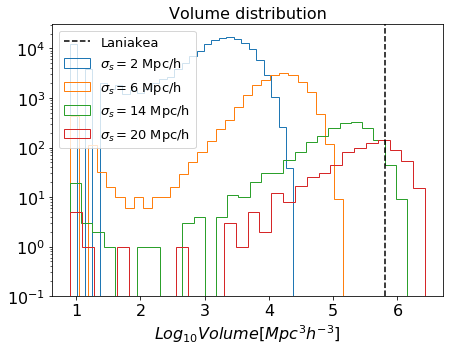

In [34]:
plt.figure(figsize = (7,5))
plt.rcParams.update({'font.size': 16})
plt.axvline(np.log10(645034.5514),linestyle = '--', color = 'black', label = 'Laniakea')

for i in range(len(archivos)):
    plt.hist(np.log10(volumenes2[i]),log=True,bins=30, histtype = 'step', label = '$\sigma_s = ${} Mpc/h'.format(archivos[i]*2))
plt.title('Volume distribution', fontsize = 16)
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$', fontsize = 16)
plt.rcParams.update({'font.size': 13})
plt.legend(loc = 2)

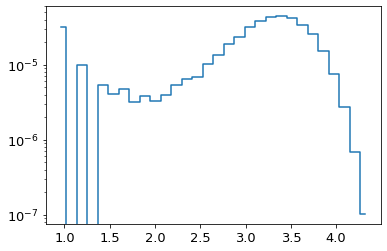

In [37]:
H, bins = np.histogram(np.log10(volumenes2[0]),bins=30)
H = H/((720**3)*bins[1]-bins[0])
bincentres = [(bins[i]+bins[i+1])/2. for i in range(len(bins)-1)]
plt.step(bincentres,H,where='mid')
plt.yscale('log')

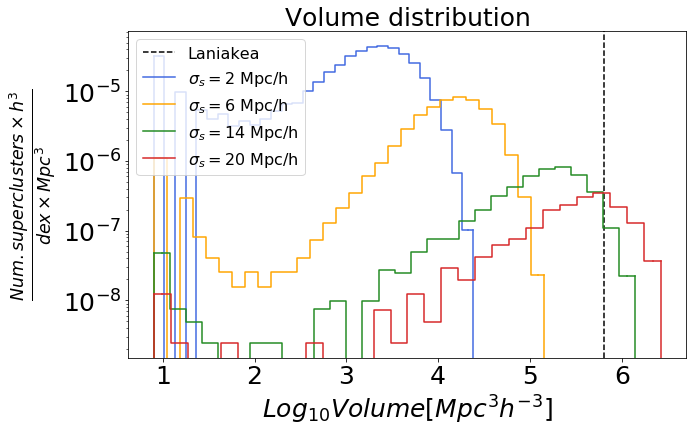

In [96]:
colores = ['royalblue', 'orange', 'forestgreen', 'tab:red']
plt.figure(figsize = (10,6))
plt.rcParams.update({'font.size': 25})
plt.axvline(np.log10(645034.5514),linestyle = '--', color = 'black', label = 'Laniakea')

for i in range(len(archivos)):
    H, bins = np.histogram(np.log10(volumenes2[i]),bins=30)
    H = H/((720**3)*bins[1]-bins[0])
    bincentres = [(bins[j]+bins[j+1])/2. for j in range(len(bins)-1)]
    plt.step(bincentres,H,where='mid', label = '$\sigma_s = ${} Mpc/h'.format(archivos[i]*2), c = colores[i])
    plt.plot((bins[-1], bins[-1]), (0, H[-1]),colores[i])
    plt.plot((bincentres[-1], bins[-1]), (H[-1], H[-1]),colores[i])
    plt.plot((bins[0], bins[0]), (0, H[0]),colores[i])
    plt.plot((bincentres[0], bins[0]), (H[0], H[0]),colores[i])
plt.yscale('log')
plt.title('Volume distribution', fontsize = 25)
plt.xlabel('$Log_{10}Volume[Mpc^3h^{-3}]$', fontsize = 25)
plt.ylabel(r'$\frac{Num. superclusters \times h^3}{dex \times Mpc^3}$', fontsize = 25)
plt.rcParams.update({'font.size': 16})
plt.legend(loc = 2)
plt.savefig('vol_different_sigmas.png')